In [1]:
# Importar las librerias necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime

In [3]:
data_encuesta_favorabilidad_infitula = pd.read_csv('Encuesta_nivel_conocimiento_infitulua - Encuesta_nivel_conocimiento_infitulua - 2024-05-23T14-24-52-0300.csv')

In [4]:
data_instagram_infitula = pd.read_csv('Aug-31-2024_Oct-01-2024_8355509281241810.csv')

In [5]:
data_facebook_infitulua = pd.read_csv('Aug-31-2024_Oct-01-2024_2067679263690982.csv')

In [6]:
data_instagram_historias_infitulua = pd.read_csv('Historias/Sep-01-2024_Sep-15-2024_1331728841130932.csv')

In [7]:
# Cargar el dataset unificado (ajusta la ruta según tu entorno)
df_unified = pd.read_csv('Informe_recopilatorio_definitivo/Facebook/dataset_unificado_mayo_septiembre_2024.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Informe_recopilatorio_definitivo/Facebook/dataset_unificado_mayo_septiembre_2024.csv'

In [8]:
data_instagram_infitula

,Identificador de la publicación,Identificador de la cuenta,Nombre de usuario de la cuenta,Nombre de la cuenta,Descripción,Duración (segundos),Hora de publicación,Enlace permanente,Tipo de publicación,Comentario sobre los datos,Fecha,Impresiones,Alcance,Me gusta,Veces que se compartió,Seguimientos,Reproducciones,Comentarios,Veces que se guardó
0,18061957822595436,17841400356362656,infitulua,INFITULUÁ E.I.C.E,¡Desde INFITULUÁ trabajamos día a día para est...,0,09/10/2024 11:25,https://www.instagram.com/p/C_vyFKjuwfK/,Imagen de Instagram,NaN,Total,333,241,8,1,NaN,NaN,0,0
1,18061459438644548,17841400356362656,infitulua,INFITULUÁ E.I.C.E,🚀¡Tu negocio debe ir en el corazón de Tuluá! ❤...,59,09/02/2024 14:50,https://www.instagram.com/reel/C_bjHJYIOMH/,Reel de Instagram,NaN,Total,662,507,18,5,NaN,819.0,0,0
2,17859405795251615,17841400356362656,infitulua,INFITULUÁ E.I.C.E,"Con un esfuerzo constante, hemos avanzado sign...",57,09/26/2024 08:43,https://www.instagram.com/reel/DAYsJpwOm6B/,Reel de Instagram,NaN,Total,653,495,57,4,1.0,958.0,0,3
3,17948365142848048,17841400356362656,infitulua,INFITULUÁ E.I.C.E,"¡Tu éxito comercial, empieza AQUÍ! ✅\n\nConoce...",48,09/20/2024 10:01,https://www.instagram.com/reel/DAJYWFxhVdD/,Reel de Instagram,NaN,Total,550,359,11,2,1.0,671.0,0,0
4,18008645240400462,17841400356362656,infitulua,INFITULUÁ E.I.C.E,❤️ ¿No sabes qué dar en estas fechas? ¡Regala ...,32,09/18/2024 10:01,https://www.instagram.com/reel/DAEOzRAMlJN/,Reel de Instagram,NaN,Total,1643,1349,36,4,2.0,1997.0,0,1
5,18013843901335089,17841400356362656,infitulua,INFITULUÁ E.I.C.E,¡Conoce estas excelentes oportunidades con la ...,45,09/17/2024 11:00,https://www.instagram.com/reel/DABw0FaqRgE/,Reel de Instagram,NaN,Total,1098,770,34,4,1.0,1363.0,0,0


  Hora de publicación  Impresiones  Alcance  Veces que se compartió  Me gusta  \
1 2024-09-02 14:50:00          662      507                       5        18   
0 2024-09-10 11:25:00          333      241                       1         8   
5 2024-09-17 11:00:00         1098      770                       4        34   
4 2024-09-18 10:01:00         1643     1349                       4        36   
3 2024-09-20 10:01:00          550      359                       2        11   

   Veces que se guardó  
1                    0  
0                    0  
5                    0  
4                    1  
3                    0  
  Hora de publicación  Impresiones  Alcance  Veces que se compartió  Me gusta  \
0 2024-09-10 11:25:00          333      241                       1         8   
5 2024-09-17 11:00:00         1098      770                       4        34   
4 2024-09-18 10:01:00         1643     1349                       4        36   
3 2024-09-20 10:01:00          550     

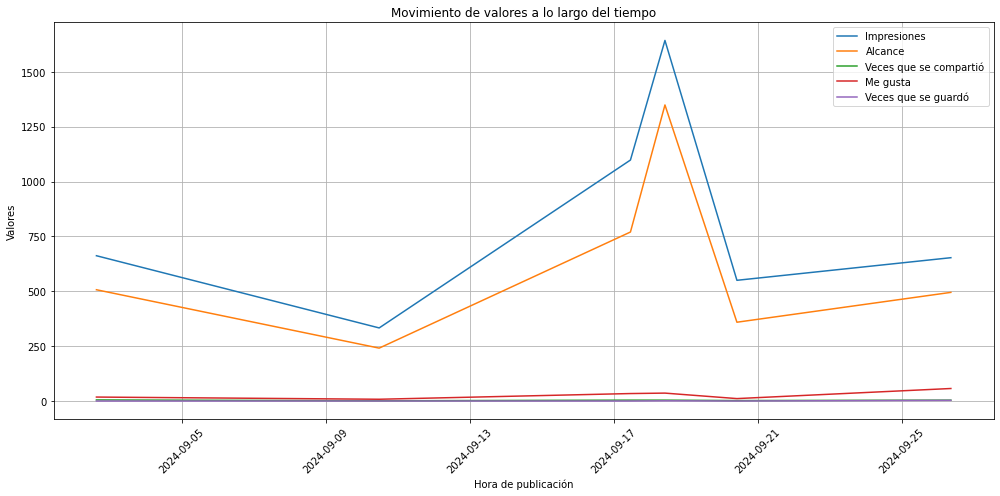

In [9]:
# Asegurarnos de que no haya espacios en los nombres de las columnas
data_instagram_infitula.columns = data_instagram_infitula.columns.str.strip()

# Convertir 'Hora de publicación' a formato datetime y ordenar por fecha
data_instagram_infitula['Hora de publicación'] = pd.to_datetime(data_instagram_infitula['Hora de publicación'], format='%m/%d/%Y %H:%M', errors='coerce')
data_linea_temporal_infitulua_original = data_instagram_infitula.sort_values(by='Hora de publicación')

# Seleccionar columnas relevantes sin eliminar filas con valores NaN
selected_columns = ['Hora de publicación', 'Impresiones', 'Alcance', 'Veces que se compartió', 'Me gusta', 'Veces que se guardó']
data_linea_temporal_infitulua_original = data_linea_temporal_infitulua_original[selected_columns]

# Interpolar valores nulos
data_linea_temporal_infitulua_original[['Impresiones', 'Alcance', 'Veces que se compartió', 'Me gusta', 'Veces que se guardó']] = data_linea_temporal_infitulua_original[['Impresiones', 'Alcance', 'Veces que se compartió', 'Me gusta', 'Veces que se guardó']].interpolate()

# Mostrar datos intermedios para verificar
print(data_linea_temporal_infitulua_original.head())
print(data_linea_temporal_infitulua_original.tail())

# Graficar los datos
plt.figure(figsize=(14, 7))

plt.plot(data_linea_temporal_infitulua_original['Hora de publicación'], data_linea_temporal_infitulua_original['Impresiones'], label='Impresiones')
plt.plot(data_linea_temporal_infitulua_original['Hora de publicación'], data_linea_temporal_infitulua_original['Alcance'], label='Alcance')
plt.plot(data_linea_temporal_infitulua_original['Hora de publicación'], data_linea_temporal_infitulua_original['Veces que se compartió'], label='Veces que se compartió')
plt.plot(data_linea_temporal_infitulua_original['Hora de publicación'], data_linea_temporal_infitulua_original['Me gusta'], label='Me gusta')
plt.plot(data_linea_temporal_infitulua_original['Hora de publicación'], data_linea_temporal_infitulua_original['Veces que se guardó'], label='Veces que se guardó')

plt.xlabel('Hora de publicación')
plt.ylabel('Valores')
plt.title('Movimiento de valores a lo largo del tiempo')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [12]:
data_encuesta_favorabilidad_infitula

,Registro,Dispositivo,Año de Nacimiento del encuestado,¿Conoce qué hace la institución INFITULUA?,¿Cuáles de estos servicios ha utilizado?,¿Cómo calificaría los servicios de Infitulua si los ha utilizado recientemente?,Duración
0,2024-05-23 13:42:57,phone,17 03 1966,"Más o menos, pero no lo sé todo.",Cliente de Mercaplaza,No he utilizado los servicios,03:08
1,2024-05-23 13:12:16,phone,1997,"Si, lo sé muy bien","Cliente nueva Terminal de Transportes, Cliente...",Buenos,00:46
2,2024-05-23 12:33:26,phone,1956,"No, no conozco esta institución","Cliente nueva Terminal de Transportes, Cliente...",No he utilizado los servicios,01:16
3,2024-05-23 11:48:03,phone,04/14/1961,"Si, lo sé muy bien","Cliente nueva Terminal de Transportes, Cliente...",Buenos,02:16
4,2024-05-23 11:44:17,phone,1956,"Más o menos, pero no lo sé todo.",Ninguno,Buenos,51:01
...,...,...,...,...,...,...,...
276,2024-08-26 18:46:24,teléfono,1997,"Sé que existe, pero no sé qué hace","Cliente nueva Terminal de Transportes, Cliente...",Malos,00:32
277,2024-08-28 12:55:58,teléfono,1993,"Más o menos, pero no lo sé todo.",Cliente nueva Terminal de Transportes,Muy buenos,00:31
278,2024-09-02 16:37:45,computer,2003,"Si, lo sé muy bien",Cliente Nuevo Centro Comercial Pabellón,Muy buenos,00:34
279,2024-10-04 08:08:34,teléfono,1988,"Más o menos, pero no lo sé todo.",Cliente de Urbanización Terranova,Pésimos,00:34


In [13]:
data_encuesta_favorabilidad_infitula['hora_exacta'] = data_encuesta_favorabilidad_infitula['Registro'].str.split(' ').str[1]
data_encuesta_favorabilidad_infitula['Registro'] = data_encuesta_favorabilidad_infitula['Registro'].str.split(' ').str[0]
data_encuesta_favorabilidad_infitula['Registro'] = pd.to_datetime(data_encuesta_favorabilidad_infitula['Registro']).dt.strftime('%d/%m/%Y')

print(data_encuesta_favorabilidad_infitula)

       Registro Dispositivo Año de Nacimiento del encuestado  \
0    23/05/2024       phone                       17 03 1966   
1    23/05/2024       phone                             1997   
2    23/05/2024       phone                             1956   
3    23/05/2024       phone                       04/14/1961   
4    23/05/2024       phone                             1956   
..          ...         ...                              ...   
276  26/08/2024    teléfono                             1997   
277  28/08/2024    teléfono                             1993   
278  02/09/2024    computer                             2003   
279  04/10/2024    teléfono                             1988   
280  04/10/2024    teléfono                             1988   

    ¿Conoce qué hace la institución INFITULUA?  \
0             Más o menos, pero no lo sé todo.   
1                           Si, lo sé muy bien   
2              No, no conozco esta institución   
3                           Si,

In [14]:
# Definir una función para extraer el año de la columna 'Año de Nacimiento del encuestado'
def extract_year(year_str):
    if pd.isnull(year_str):
        return year_str  # Devolver NaN tal cual
    year_digits = ''.join(filter(str.isdigit, str(year_str)))
    if len(year_digits) >= 4:
        return int(year_digits[-4:])  # Mantener solo los últimos 4 dígitos
    return pd.NA  # Devolver NaN si no hay suficientes dígitos

# Aplicar la función a la columna
data_encuesta_favorabilidad_infitula['Año de Nacimiento del encuestado'] = data_encuesta_favorabilidad_infitula['Año de Nacimiento del encuestado'].apply(extract_year)

# Convertir la columna al tipo entero, manejando adecuadamente los NaNs
data_encuesta_favorabilidad_infitula['Año de Nacimiento del encuestado'] = pd.to_numeric(data_encuesta_favorabilidad_infitula['Año de Nacimiento del encuestado'], errors='coerce').astype('Int64')

data_encuesta_favorabilidad_infitula

,Registro,Dispositivo,Año de Nacimiento del encuestado,¿Conoce qué hace la institución INFITULUA?,¿Cuáles de estos servicios ha utilizado?,¿Cómo calificaría los servicios de Infitulua si los ha utilizado recientemente?,Duración,hora_exacta
0,23/05/2024,phone,1966,"Más o menos, pero no lo sé todo.",Cliente de Mercaplaza,No he utilizado los servicios,03:08,13:42:57
1,23/05/2024,phone,1997,"Si, lo sé muy bien","Cliente nueva Terminal de Transportes, Cliente...",Buenos,00:46,13:12:16
2,23/05/2024,phone,1956,"No, no conozco esta institución","Cliente nueva Terminal de Transportes, Cliente...",No he utilizado los servicios,01:16,12:33:26
3,23/05/2024,phone,1961,"Si, lo sé muy bien","Cliente nueva Terminal de Transportes, Cliente...",Buenos,02:16,11:48:03
4,23/05/2024,phone,1956,"Más o menos, pero no lo sé todo.",Ninguno,Buenos,51:01,11:44:17
...,...,...,...,...,...,...,...,...
276,26/08/2024,teléfono,1997,"Sé que existe, pero no sé qué hace","Cliente nueva Terminal de Transportes, Cliente...",Malos,00:32,18:46:24
277,28/08/2024,teléfono,1993,"Más o menos, pero no lo sé todo.",Cliente nueva Terminal de Transportes,Muy buenos,00:31,12:55:58
278,02/09/2024,computer,2003,"Si, lo sé muy bien",Cliente Nuevo Centro Comercial Pabellón,Muy buenos,00:34,16:37:45
279,04/10/2024,teléfono,1988,"Más o menos, pero no lo sé todo.",Cliente de Urbanización Terranova,Pésimos,00:34,08:08:34


In [15]:
# Convertir la columna al tipo entero, manejando adecuadamente los NaNs
data_encuesta_favorabilidad_infitula['Año de Nacimiento del encuestado'] = pd.to_numeric(data_encuesta_favorabilidad_infitula['Año de Nacimiento del encuestado'], errors='coerce').astype('Int64')

# Calcular la edad de los encuestados
current_year = datetime.now().year
data_encuesta_favorabilidad_infitula['Edad del encuestado'] = current_year - data_encuesta_favorabilidad_infitula['Año de Nacimiento del encuestado']
data_encuesta_favorabilidad_infitula

,Registro,Dispositivo,Año de Nacimiento del encuestado,¿Conoce qué hace la institución INFITULUA?,¿Cuáles de estos servicios ha utilizado?,¿Cómo calificaría los servicios de Infitulua si los ha utilizado recientemente?,Duración,hora_exacta,Edad del encuestado
0,23/05/2024,phone,1966,"Más o menos, pero no lo sé todo.",Cliente de Mercaplaza,No he utilizado los servicios,03:08,13:42:57,58
1,23/05/2024,phone,1997,"Si, lo sé muy bien","Cliente nueva Terminal de Transportes, Cliente...",Buenos,00:46,13:12:16,27
2,23/05/2024,phone,1956,"No, no conozco esta institución","Cliente nueva Terminal de Transportes, Cliente...",No he utilizado los servicios,01:16,12:33:26,68
3,23/05/2024,phone,1961,"Si, lo sé muy bien","Cliente nueva Terminal de Transportes, Cliente...",Buenos,02:16,11:48:03,63
4,23/05/2024,phone,1956,"Más o menos, pero no lo sé todo.",Ninguno,Buenos,51:01,11:44:17,68
...,...,...,...,...,...,...,...,...,...
276,26/08/2024,teléfono,1997,"Sé que existe, pero no sé qué hace","Cliente nueva Terminal de Transportes, Cliente...",Malos,00:32,18:46:24,27
277,28/08/2024,teléfono,1993,"Más o menos, pero no lo sé todo.",Cliente nueva Terminal de Transportes,Muy buenos,00:31,12:55:58,31
278,02/09/2024,computer,2003,"Si, lo sé muy bien",Cliente Nuevo Centro Comercial Pabellón,Muy buenos,00:34,16:37:45,21
279,04/10/2024,teléfono,1988,"Más o menos, pero no lo sé todo.",Cliente de Urbanización Terranova,Pésimos,00:34,08:08:34,36


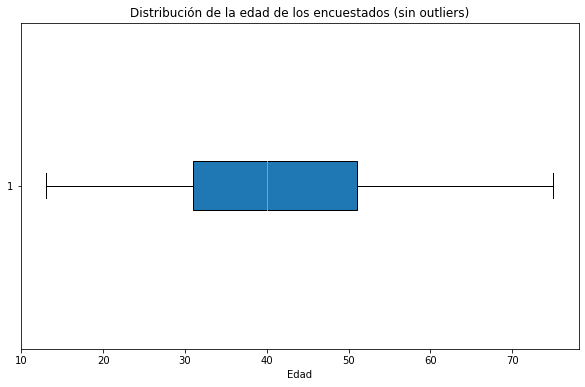

In [16]:
# Filtrar edades no nulas
edades = data_encuesta_favorabilidad_infitula['Edad del encuestado'].dropna()

# Calcular los límites para identificar outliers
Q1 = edades.quantile(0.25)
Q3 = edades.quantile(0.75)
IQR = Q3 - Q1

# Limites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar datos dentro de los límites
filtered_edades = edades[(edades >= lower_bound) & (edades <= upper_bound)]

# Visualización de la columna 'Edad del encuestado' sin outliers en forma de boxplot
fig, ax = plt.subplots(figsize=(10, 6))

# Generar boxplot sin outliers
ax.boxplot(filtered_edades, vert=False, patch_artist=True)
ax.set_title('Distribución de la edad de los encuestados (sin outliers)')
ax.set_xlabel('Edad')

plt.show()

In [17]:
data_instagram_infitula.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Identificador de la publicación  6 non-null      int64         
 1   Identificador de la cuenta       6 non-null      int64         
 2   Nombre de usuario de la cuenta   6 non-null      object        
 3   Nombre de la cuenta              6 non-null      object        
 4   Descripción                      6 non-null      object        
 5   Duración (segundos)              6 non-null      int64         
 6   Hora de publicación              6 non-null      datetime64[ns]
 7   Enlace permanente                6 non-null      object        
 8   Tipo de publicación              6 non-null      object        
 9   Comentario sobre los datos       0 non-null      float64       
 10  Fecha                            6 non-null      object        
 1

In [18]:
data_instagram_infitula.shape

(6, 19)

In [19]:
# Convertir la columna 'Hora de publicación' a tipo datetime, manejar errores con 'coerce'
data_instagram_infitula['Hora de publicación'] = pd.to_datetime(data_instagram_infitula['Hora de publicación'], format='%d/%m/%Y %H:%M', errors='coerce')

# Crear una nueva columna 'hora_exacta' con la hora en formato HH:MM
data_instagram_infitula['hora_exacta'] = data_instagram_infitula['Hora de publicación'].dt.strftime('%H:%M')

# Mantener solo la fecha en la columna 'Hora de publicación'
data_instagram_infitula['Hora de publicación'] = data_instagram_infitula['Hora de publicación'].dt.strftime('%d/%m/%Y')

# Mostrar el DataFrame resultante
print(data_instagram_infitula)

   Identificador de la publicación  Identificador de la cuenta  \
0                18061957822595436           17841400356362656   
1                18061459438644548           17841400356362656   
2                17859405795251615           17841400356362656   
3                17948365142848048           17841400356362656   
4                18008645240400462           17841400356362656   
5                18013843901335089           17841400356362656   

  Nombre de usuario de la cuenta Nombre de la cuenta  \
0                      infitulua   INFITULUÁ E.I.C.E   
1                      infitulua   INFITULUÁ E.I.C.E   
2                      infitulua   INFITULUÁ E.I.C.E   
3                      infitulua   INFITULUÁ E.I.C.E   
4                      infitulua   INFITULUÁ E.I.C.E   
5                      infitulua   INFITULUÁ E.I.C.E   

                                         Descripción  Duración (segundos)  \
0  ¡Desde INFITULUÁ trabajamos día a día para est...               

In [20]:
data_instagram_infitula.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Identificador de la publicación  6 non-null      int64  
 1   Identificador de la cuenta       6 non-null      int64  
 2   Nombre de usuario de la cuenta   6 non-null      object 
 3   Nombre de la cuenta              6 non-null      object 
 4   Descripción                      6 non-null      object 
 5   Duración (segundos)              6 non-null      int64  
 6   Hora de publicación              6 non-null      object 
 7   Enlace permanente                6 non-null      object 
 8   Tipo de publicación              6 non-null      object 
 9   Comentario sobre los datos       0 non-null      float64
 10  Fecha                            6 non-null      object 
 11  Impresiones                      6 non-null      int64  
 12  Alcance                   

In [21]:
data_cuantitativa_infitulua_insta= data_instagram_infitula[['Veces que se guardó','Impresiones','Veces que se compartió','Alcance', 'Me gusta','Reproducciones','Comentarios','Seguimientos','Duración (segundos)']]
data_cuantitativa_infitulua_insta.head()

,Veces que se guardó,Impresiones,Veces que se compartió,Alcance,Me gusta,Reproducciones,Comentarios,Seguimientos,Duración (segundos)
0,0,333,1,241,8,NaN,0,NaN,0
1,0,662,5,507,18,819.0,0,NaN,59
2,3,653,4,495,57,958.0,0,1.0,57
3,0,550,2,359,11,671.0,0,1.0,48
4,1,1643,4,1349,36,1997.0,0,2.0,32


In [22]:
data_encuesta_favorabilidad_infitula.describe()

,Año de Nacimiento del encuestado,Edad del encuestado
count,264.000000,264.000000
mean,1936.753788,87.246212
std,231.204426,231.204426
min,459.000000,13.000000
25%,1971.000000,32.000000
50%,1984.000000,40.000000
75%,1992.000000,53.000000
max,2011.000000,1565.000000


In [23]:
data_cuantitativa_infitulua_insta.describe()

,Veces que se guardó,Impresiones,Veces que se compartió,Alcance,Me gusta,Reproducciones,Comentarios,Seguimientos,Duración (segundos)
count,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,6.0,4.00,6.000000
mean,0.666667,823.166667,3.333333,620.166667,27.333333,1161.600000,0.0,1.25,40.166667
std,1.211060,472.752543,1.505545,398.521476,18.586734,533.378665,0.0,0.50,21.921831
min,0.000000,333.000000,1.000000,241.000000,8.000000,671.000000,0.0,1.00,0.000000
25%,0.000000,575.750000,2.500000,393.000000,12.750000,819.000000,0.0,1.00,35.250000
50%,0.000000,657.500000,4.000000,501.000000,26.000000,958.000000,0.0,1.00,46.500000
75%,0.750000,989.000000,4.000000,704.250000,35.500000,1363.000000,0.0,1.25,54.750000
max,3.000000,1643.000000,5.000000,1349.000000,57.000000,1997.000000,0.0,2.00,59.000000


<AxesSubplot:>

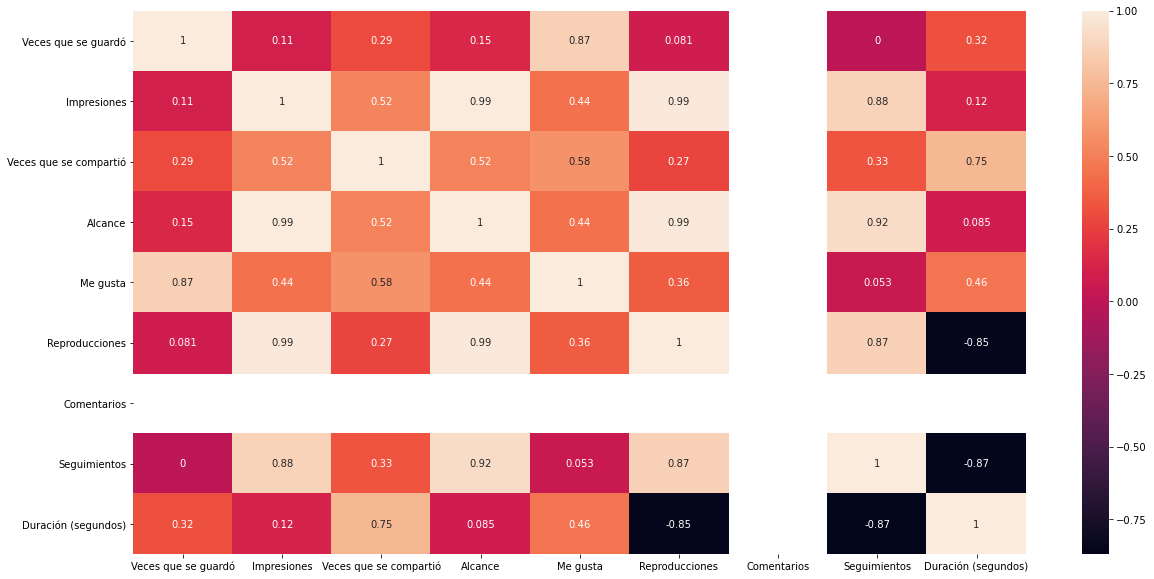

In [24]:
plt.figure(figsize=(20, 10))
sns.heatmap(data_cuantitativa_infitulua_insta.corr(),  annot=True)

In [25]:
indice_MEGUSTAS_maximo = data_instagram_infitula['Me gusta'].idxmax()
id_publicacion_MEGUSTAS_maximo = data_instagram_infitula.loc[indice_MEGUSTAS_maximo, 'Identificador de la publicación']
# Mostrar la descripción completa de estas publicaciones
descripcion_MEGUSTAS_maximo = data_instagram_infitula.loc[data_instagram_infitula['Identificador de la publicación'] == id_publicacion_MEGUSTAS_maximo, 'Descripción'].values[0]


print("Descripción de la publicación con mayor cantidad de (me gustas) (ID:", id_publicacion_MEGUSTAS_maximo, "):", descripcion_MEGUSTAS_maximo)

Descripción de la publicación con mayor cantidad de (me gustas) (ID: 17859405795251615 ): Con un esfuerzo constante, hemos avanzado significativamente en nuestro objetivo de entregar, en el menor tiempo posible, los lotes de vivienda de la Urbanización Terranova a sus propietarios.

Se tiene proyectado entrega la primera etapa antes de finalizar el año.


In [26]:
# Encuentra los índices de las tres publicaciones con menor cantidad de 'Me gusta'
indices_menores_MEGUSTAS =  data_instagram_infitula['Me gusta'].nsmallest(3).index

# Obtén y imprime las descripciones de estas tres publicaciones
descripciones_menores_MEGUSTAS = data_instagram_infitula.loc[indices_menores_MEGUSTAS, 'Descripción'].values
print("Descripciones de las tres publicaciones con menor cantidad de (me gustas):")
for descripcion in descripciones_menores_MEGUSTAS:
    print("-" + descripcion)


Descripciones de las tres publicaciones con menor cantidad de (me gustas):
-¡Desde INFITULUÁ trabajamos día a día para estar más cerca de ti!

Por eso, te invitamos a que conozcas nuestros diferentes métodos de atención para brindarte toda la asesoría que necesitas 🥳

Continuamos construyendo una Tuluá #ParaSerFelices
-¡Tu éxito comercial, empieza AQUÍ! ✅

Conoce todas las ofertas comerciales que Bicentenario Plaza tiene para ofrecerte, con más de 50 locales comerciales listos para impulsar tu emprendimiento a un siguente nivel.

¿Qué esperas para acercarte y solicitar información? ¡Te esperamos!
-🚀¡Tu negocio debe ir en el corazón de Tuluá! ❤️
Contamos con locales comerciales diseñados estratégicamente en la Central de Transporte para la prosperidad del comercio 💡
¿Qué esperas para ver los frutos y prosperidad de tu emprendimiento? 📲 Contacta con nosotros y empieza una oportunidad ÚNICA de negocio 💪


In [27]:
data_facebook_infitulua.head()

,Identificador de la publicación,Identificador de la página,Nombre de la página,Título,Descripción,Duración (segundos),Hora de publicación,Tipo de subtítulo,Enlace permanente,Es una publicación cruzada,...,Veces que se compartió,Comentarios negativos de los usuarios: Ocultar todo,Total de clics,Clics de otro tipo,Consumo de segmentación del público coincidente (Photo Click),REELS_PLAYS:COUNT,Segundos reproducidos,Segundos en promedio reproducidos,Ingresos estimados (USD),Impresiones del anuncio
0,122158959626249234,61557477032777,Infitulua,¡Desde INFITULUÁ trabajamos día a día para est...,NaN,0,09/10/2024 11:25,NaN,https://www.facebook.com/permalink.php?story_f...,0,...,4,1.0,3,2.0,1.0,NaN,NaN,NaN,NaN,NaN
1,122156810552249234,61557477032777,Infitulua,🚀¡Tu negocio debe ir en el corazón de Tuluá! ❤...,🚀¡Tu negocio debe ir en el corazón de Tuluá! ❤...,60,09/02/2024 14:49,uploaded,https://www.facebook.com/reel/526812203059981/,1,...,11,NaN,0,NaN,NaN,946.0,5662.929,6.561,0.0,0.0
2,122161509596249234,61557477032777,Infitulua,"¡Tu éxito comercial, empieza AQUÍ! ✅\n\nConoce...","¡Tu éxito comercial, empieza AQUÍ! ✅\n\nConoce...",48,09/20/2024 10:00,uploaded,https://www.facebook.com/reel/1189039042388588/,1,...,5,NaN,0,NaN,NaN,336.0,2031.438,6.748,0.0,0.0
3,122160979478249234,61557477032777,Infitulua,❤️ ¿No sabes qué dar en estas fechas? ¡Regala ...,❤️ ¿No sabes qué dar en estas fechas? ¡Regala ...,32,09/18/2024 10:00,uploaded,https://www.facebook.com/reel/427078936589318/,1,...,9,NaN,0,NaN,NaN,881.0,4165.036,5.091,0.0,0.0
4,122160776882249234,61557477032777,Infitulua,¡Conoce estas excelentes oportunidades con la ...,¡Conoce estas excelentes oportunidades con la ...,45,09/17/2024 11:00,uploaded,https://www.facebook.com/reel/551884237297876/,1,...,14,NaN,0,NaN,NaN,861.0,5236.526,6.603,0.0,0.0


In [28]:
data_facebook_infitulua.shape

(5, 32)

In [29]:
# Convertir la columna 'Hora de publicación' a tipo datetime, manejar errores con 'coerce'
data_facebook_infitulua['Hora de publicación'] = pd.to_datetime(data_facebook_infitulua['Hora de publicación'], format='%m/%d/%Y %H:%M', errors='coerce')

# Crear una nueva columna 'hora_exacta' con la hora en formato HH:MM
data_facebook_infitulua['hora_exacta'] = data_facebook_infitulua['Hora de publicación'].dt.strftime('%H:%M')

# Mantener solo la fecha en la columna 'Hora de publicación'
data_facebook_infitulua['Hora de publicación'] = data_facebook_infitulua['Hora de publicación'].dt.strftime('%d/%m/%Y')

# Mostrar el DataFrame resultante
print(data_facebook_infitulua)

   Identificador de la publicación  Identificador de la página  \
0               122158959626249234              61557477032777   
1               122156810552249234              61557477032777   
2               122161509596249234              61557477032777   
3               122160979478249234              61557477032777   
4               122160776882249234              61557477032777   

  Nombre de la página                                             Título  \
0           Infitulua  ¡Desde INFITULUÁ trabajamos día a día para est...   
1           Infitulua  🚀¡Tu negocio debe ir en el corazón de Tuluá! ❤...   
2           Infitulua  ¡Tu éxito comercial, empieza AQUÍ! ✅\n\nConoce...   
3           Infitulua  ❤️ ¿No sabes qué dar en estas fechas? ¡Regala ...   
4           Infitulua  ¡Conoce estas excelentes oportunidades con la ...   

                                         Descripción  Duración (segundos)  \
0                                                NaN                 

In [30]:
data_no_explorada_infi_face= data_facebook_infitulua[['Tipo de publicación','Comentarios','Es una publicación cruzada','Total de clics','Veces que se compartió','Reacciones','Reacciones, comentarios y veces que se compartió','Impresiones','Duración (segundos)','Hora de publicación','Alcance']]
data_no_explorada_infi_face.head(7)

,Tipo de publicación,Comentarios,Es una publicación cruzada,Total de clics,Veces que se compartió,Reacciones,"Reacciones, comentarios y veces que se compartió",Impresiones,Duración (segundos),Hora de publicación,Alcance
0,Fotos,0,0,3,4,4,8,354,0,10/09/2024,273
1,Reels,0,1,0,11,15,26,376,60,02/09/2024,278
2,Reels,0,1,0,5,7,12,237,48,20/09/2024,176
3,Reels,0,1,0,9,14,23,302,32,18/09/2024,237
4,Reels,0,1,0,14,18,32,313,45,17/09/2024,253


In [31]:
data_cuantitativa_infi_face= data_facebook_infitulua[['Comentarios','Total de clics','Veces que se compartió','Alcance','Reacciones','Reacciones, comentarios y veces que se compartió','Impresiones','Duración (segundos)']]
data_cuantitativa_infi_face

,Comentarios,Total de clics,Veces que se compartió,Alcance,Reacciones,"Reacciones, comentarios y veces que se compartió",Impresiones,Duración (segundos)
0,0,3,4,273,4,8,354,0
1,0,0,11,278,15,26,376,60
2,0,0,5,176,7,12,237,48
3,0,0,9,237,14,23,302,32
4,0,0,14,253,18,32,313,45


In [32]:
data_cuantitativa_infi_face.describe()

,Comentarios,Total de clics,Veces que se compartió,Alcance,Reacciones,"Reacciones, comentarios y veces que se compartió",Impresiones,Duración (segundos)
count,5.0,5.000000,5.000000,5.000000,5.00000,5.00000,5.000000,5.000000
mean,0.0,0.600000,8.600000,243.400000,11.60000,20.20000,316.400000,37.000000
std,0.0,1.341641,4.159327,41.076757,5.85662,9.95992,53.593843,22.956481
min,0.0,0.000000,4.000000,176.000000,4.00000,8.00000,237.000000,0.000000
25%,0.0,0.000000,5.000000,237.000000,7.00000,12.00000,302.000000,32.000000
50%,0.0,0.000000,9.000000,253.000000,14.00000,23.00000,313.000000,45.000000
75%,0.0,0.000000,11.000000,273.000000,15.00000,26.00000,354.000000,48.000000
max,0.0,3.000000,14.000000,278.000000,18.00000,32.00000,376.000000,60.000000


<AxesSubplot:>

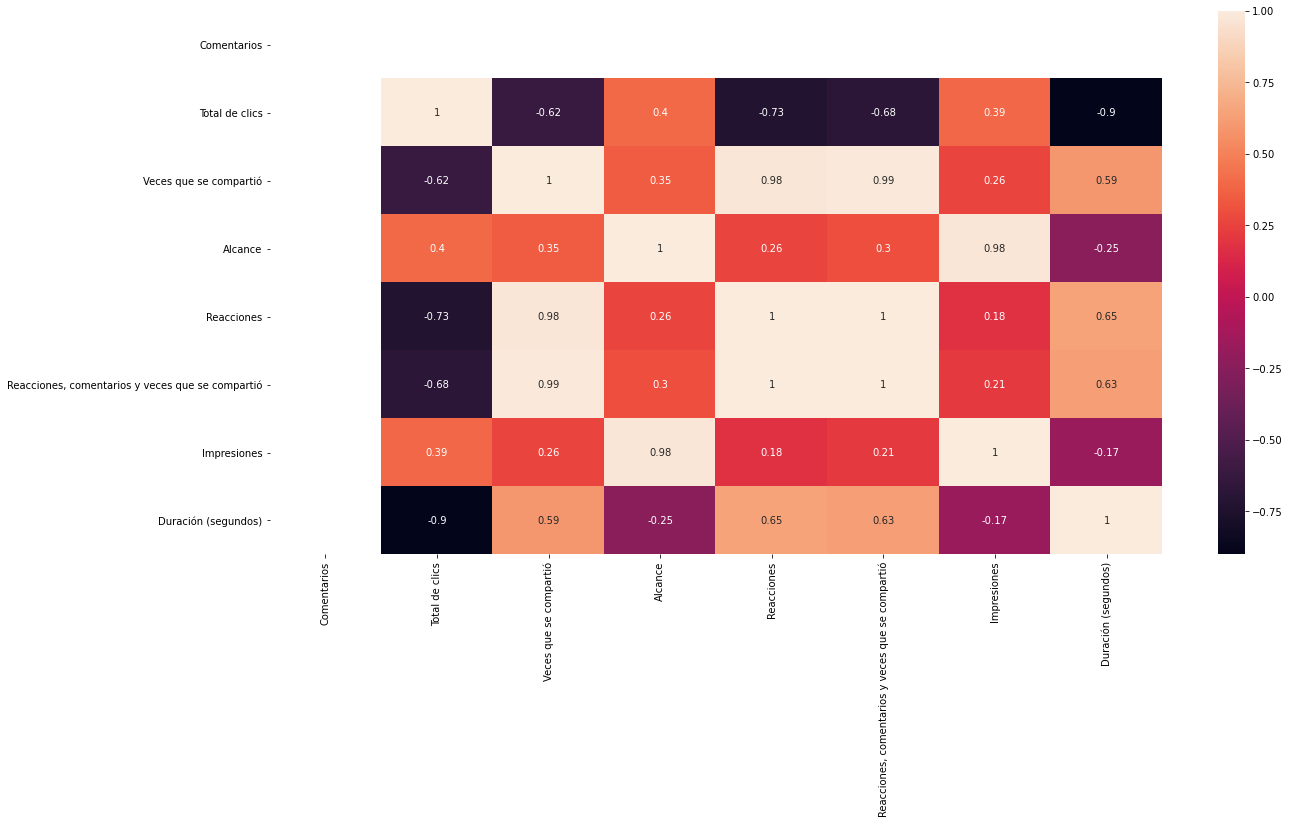

In [33]:
plt.figure(figsize=(20, 10))
sns.heatmap(data_cuantitativa_infi_face.corr(),  annot=True)

<ipython-input-34-6d17b05b35f2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_explorada_infi_face['Hora de publicación'] = pd.to_datetime(data_no_explorada_infi_face['Hora de publicación'], format='%d/%m/%Y', errors='coerce')


  Hora de publicación  Impresiones  Total de clics  Veces que se compartió  \
1          2024-09-02          376               0                      11   
0          2024-09-10          354               3                       4   
4          2024-09-17          313               0                      14   
3          2024-09-18          302               0                       9   
2          2024-09-20          237               0                       5   

   Comentarios  Reacciones, comentarios y veces que se compartió  Alcance  \
1            0                                                26      278   
0            0                                                 8      273   
4            0                                                32      253   
3            0                                                23      237   
2            0                                                12      176   

   Reacciones  
1          15  
0           4  
4          18  
3   

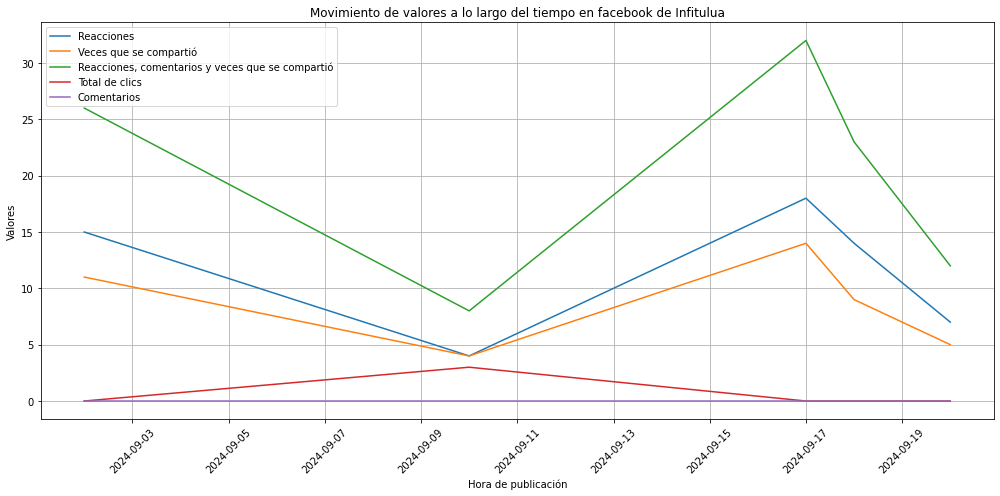

In [34]:
# Asegurarnos de que no haya espacios en los nombres de las columnas
data_no_explorada_infi_face.columns = data_no_explorada_infi_face.columns.str.strip()

# Convertir 'Hora de publicación' a formato datetime y ordenar por fecha
data_no_explorada_infi_face['Hora de publicación'] = pd.to_datetime(data_no_explorada_infi_face['Hora de publicación'], format='%d/%m/%Y', errors='coerce')
data_linea_temporal_infi_columnas_no_exploradas = data_no_explorada_infi_face.sort_values(by='Hora de publicación')

# Seleccionar columnas relevantes sin eliminar filas con valores NaN
selected_columns = ['Hora de publicación', 'Impresiones', 'Total de clics', 'Veces que se compartió', 'Comentarios', 'Reacciones, comentarios y veces que se compartió','Alcance','Reacciones']
data_linea_temporal_infi_columnas_no_exploradas = data_linea_temporal_infi_columnas_no_exploradas[selected_columns]

# Interpolar valores nulos
data_linea_temporal_infi_columnas_no_exploradas[['Impresiones', 'Alcance', 'Veces que se compartió', 'Reacciones, comentarios y veces que se compartió', 'Total de clics','Reacciones']] = data_linea_temporal_infi_columnas_no_exploradas[['Impresiones', 'Alcance', 'Veces que se compartió', 'Reacciones, comentarios y veces que se compartió', 'Total de clics','Reacciones']].interpolate()

# Mostrar datos intermedios para verificar
print(data_linea_temporal_infi_columnas_no_exploradas.head())
print(data_linea_temporal_infi_columnas_no_exploradas.tail())

# Graficar los datos
plt.figure(figsize=(14, 7))

plt.plot(data_linea_temporal_infi_columnas_no_exploradas['Hora de publicación'], data_linea_temporal_infi_columnas_no_exploradas['Reacciones'], label='Reacciones')
plt.plot(data_linea_temporal_infi_columnas_no_exploradas['Hora de publicación'], data_linea_temporal_infi_columnas_no_exploradas['Veces que se compartió'], label='Veces que se compartió')
plt.plot(data_linea_temporal_infi_columnas_no_exploradas['Hora de publicación'], data_linea_temporal_infi_columnas_no_exploradas['Reacciones, comentarios y veces que se compartió'], label='Reacciones, comentarios y veces que se compartió')
plt.plot(data_linea_temporal_infi_columnas_no_exploradas['Hora de publicación'], data_linea_temporal_infi_columnas_no_exploradas['Total de clics'], label='Total de clics')
plt.plot(data_linea_temporal_infi_columnas_no_exploradas['Hora de publicación'], data_linea_temporal_infi_columnas_no_exploradas['Comentarios'], label='Comentarios')

plt.xlabel('Hora de publicación')
plt.ylabel('Valores')
plt.title('Movimiento de valores a lo largo del tiempo en facebook de Infitulua')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [35]:
indice_reacciones_maximo = data_facebook_infitulua['Reacciones, comentarios y veces que se compartió'].idxmax()
id_publicacion_reacciones_maximo = data_facebook_infitulua.loc[indice_reacciones_maximo, 'Identificador de la publicación']
# Mostrar la descripción completa de estas publicaciones
descripcion_reacciones_maximo = data_facebook_infitulua.loc[data_facebook_infitulua['Identificador de la publicación'] == id_publicacion_reacciones_maximo, 'Descripción'].values[0]

print("Descripción de la publicación con mayor cantidad de (me gustas) (ID:", id_publicacion_reacciones_maximo, "):", descripcion_reacciones_maximo)

Descripción de la publicación con mayor cantidad de (me gustas) (ID: 122160776882249234 ): ¡Conoce estas excelentes oportunidades con la Ciudadela Regional del Comercio!

Contamos con una gran ubicación y disponibilidad para todas las personas.

¡Contáctanos! Para brindarte la información que necesitas.


In [36]:
# Encuentra el índice de la fila con el mayor número de comentarios
indice_comentarios_maximo = data_facebook_infitulua['Comentarios'].idxmax()

# Obtén el identificador de la publicación con la mayor cantidad de comentarios
id_publicacion_comentarios_maximo = data_facebook_infitulua.loc[indice_comentarios_maximo, 'Identificador de la publicación']

# Mostrar la descripción completa de la publicación
descripcion_comentarios_maximo = data_facebook_infitulua.loc[data_facebook_infitulua['Identificador de la publicación'] == id_publicacion_comentarios_maximo, 'Descripción'].values[0]

# Imprime la descripción de la publicación con la mayor cantidad de comentarios
print("Descripción de la publicación con mayor cantidad de comentarios (ID:", id_publicacion_comentarios_maximo, "):", descripcion_comentarios_maximo)


Descripción de la publicación con mayor cantidad de comentarios (ID: 122158959626249234 ): nan


In [37]:
# Encuentra el índice de la fila con el alcance mínimo
indice_alcance_minimo = data_facebook_infitulua['Alcance'].idxmin()

# Obtén el identificador de la publicación con el alcance mínimo
id_publicacion_alcance_minimo = data_facebook_infitulua.loc[indice_alcance_minimo, 'Identificador de la publicación']

# Imprime el identificador de la publicación con menor alcance
print("Identificador de la publicación con menor alcance:", id_publicacion_alcance_minimo)

# Encuentra la descripción correspondiente a ese identificador de publicación
descripcion_alcance_minimo = data_facebook_infitulua.loc[data_facebook_infitulua['Identificador de la publicación'] == id_publicacion_alcance_minimo, 'Descripción'].values[0]

# Imprime la descripción correspondiente al ID con menor alcance
print(f"Descripción de la publicación con menor alcance (ID: {id_publicacion_alcance_minimo}): {descripcion_alcance_minimo}")

# Encuentra los índices de las tres publicaciones con menor alcance
indices_tres_menores_alcances = data_facebook_infitulua['Alcance'].nsmallest(3).index

# Obtén y convierte a string las descripciones de estas tres publicaciones
descripciones_tres_menores_alcances = data_facebook_infitulua.loc[indices_tres_menores_alcances, 'Descripción'].values

print("Descripciones de las tres publicaciones con menor alcance Infitulua:")
for descripcion in descripciones_tres_menores_alcances:
    # Convierte a string cualquier valor que no sea una cadena
    print("- " + str(descripcion))


Identificador de la publicación con menor alcance: 122161509596249234
Descripción de la publicación con menor alcance (ID: 122161509596249234): ¡Tu éxito comercial, empieza AQUÍ! ✅

Conoce todas las ofertas comerciales que Bicentenario Plaza tiene para ofrecerte, con más de 50 locales comerciales listos para impulsar tu emprendimiento a un siguente nivel.

¿Qué esperas para acercarte y solicitar información? ¡Te esperamos!
Descripciones de las tres publicaciones con menor alcance Infitulua:
- ¡Tu éxito comercial, empieza AQUÍ! ✅

Conoce todas las ofertas comerciales que Bicentenario Plaza tiene para ofrecerte, con más de 50 locales comerciales listos para impulsar tu emprendimiento a un siguente nivel.

¿Qué esperas para acercarte y solicitar información? ¡Te esperamos!
- ❤️ ¿No sabes qué dar en estas fechas? ¡Regala desde el comercio tulueño! 🎁 Conoce la variedad de productos que tenemos para ofrecerte en La Galería, el Centro Comercial Pabellón y Bicentenario Plaza. ¿Qué estás espera

In [38]:
data_facebook_infitulua.shape

(5, 33)

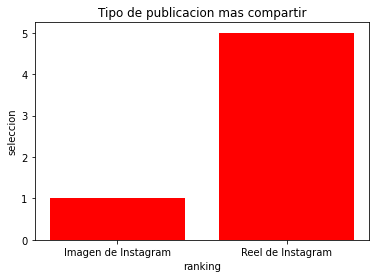

In [39]:
## Declaramos valores para el eje x
eje_x = data_instagram_infitula['Tipo de publicación']
 
## Declaramos valores para el eje y
eje_y = data_instagram_infitula['Veces que se compartió']
 
## Creamos Gráfica
plt.bar(eje_x, eje_y, color="red")

plt.rcParams["figure.figsize"] = (10, 6)

## Legenda en el eje y
plt.ylabel('seleccion')
 
## Legenda en el eje x
plt.xlabel('ranking')
 
## Título de Gráfica
plt.title('Tipo de publicacion mas compartir')


plt.show()

In [40]:
data_encuesta_favorabilidad_infitula.head()

,Registro,Dispositivo,Año de Nacimiento del encuestado,¿Conoce qué hace la institución INFITULUA?,¿Cuáles de estos servicios ha utilizado?,¿Cómo calificaría los servicios de Infitulua si los ha utilizado recientemente?,Duración,hora_exacta,Edad del encuestado
0,23/05/2024,phone,1966,"Más o menos, pero no lo sé todo.",Cliente de Mercaplaza,No he utilizado los servicios,03:08,13:42:57,58
1,23/05/2024,phone,1997,"Si, lo sé muy bien","Cliente nueva Terminal de Transportes, Cliente...",Buenos,00:46,13:12:16,27
2,23/05/2024,phone,1956,"No, no conozco esta institución","Cliente nueva Terminal de Transportes, Cliente...",No he utilizado los servicios,01:16,12:33:26,68
3,23/05/2024,phone,1961,"Si, lo sé muy bien","Cliente nueva Terminal de Transportes, Cliente...",Buenos,02:16,11:48:03,63
4,23/05/2024,phone,1956,"Más o menos, pero no lo sé todo.",Ninguno,Buenos,51:01,11:44:17,68


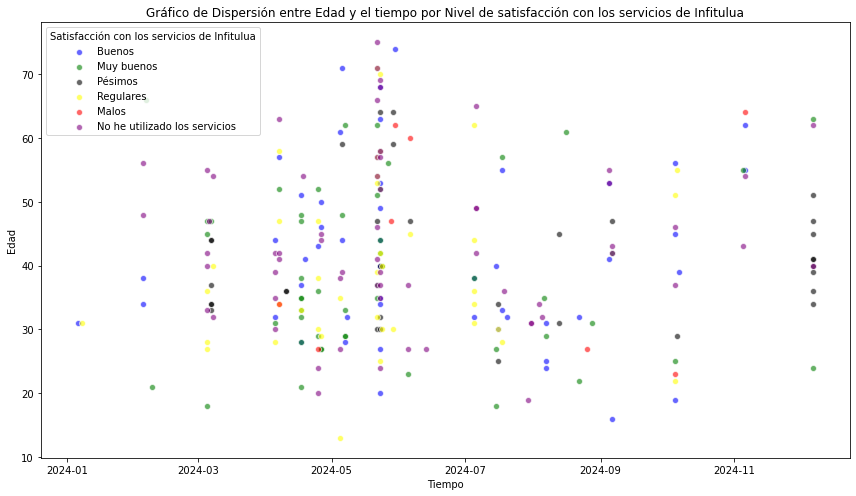

In [41]:
# Cambiar el formato del registro a datetime
data_encuesta_favorabilidad_infitula['Registro'] = pd.to_datetime(data_encuesta_favorabilidad_infitula['Registro'], errors='coerce')

# Filtrar filas con valores nulos en 'Registro' o 'Edad del encuestado'
data_encuesta_favorabilidad_infitulua_nivel_satisfaccion = data_encuesta_favorabilidad_infitula.dropna(subset=['Registro', 'Edad del encuestado'])

# Filtrar filas donde 'Edad del encuestado' sea mayor o igual a 75
data_encuesta_favorabilidad_infitulua_nivel_satisfaccion = data_encuesta_favorabilidad_infitulua_nivel_satisfaccion[data_encuesta_favorabilidad_infitulua_nivel_satisfaccion['Edad del encuestado'] <= 75]

# Definir colores para cada nivel de satisfacción
colors = {
    'Buenos': 'blue',
    'Muy buenos': 'green',
    'Pésimos': 'black',
    'Regulares': 'yellow',
    'Malos': 'red',
    'No he utilizado los servicios': 'purple'
}

# Crear el gráfico de dispersión diferenciado por nivel de satisfacción
fig, ax = plt.subplots(figsize=(12, 7))

for satisfaccion, color in colors.items():
    subset = data_encuesta_favorabilidad_infitulua_nivel_satisfaccion[data_encuesta_favorabilidad_infitulua_nivel_satisfaccion['¿Cómo calificaría los servicios de Infitulua si los ha utilizado recientemente?'] == satisfaccion]
    ax.scatter(subset['Registro'], subset['Edad del encuestado'], c=color, label=satisfaccion, alpha=0.6, edgecolors='white')

ax.set_title('Gráfico de Dispersión entre Edad y el tiempo por Nivel de satisfacción con los servicios de Infitulua')
ax.set_ylabel('Edad')
ax.set_xlabel('Tiempo')
ax.legend(title='Satisfacción con los servicios de Infitulua')

plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'Distribución de satisfaccion'}, ylabel='¿Cómo calificaría los servicios de Infitulua si los ha utilizado recientemente?'>

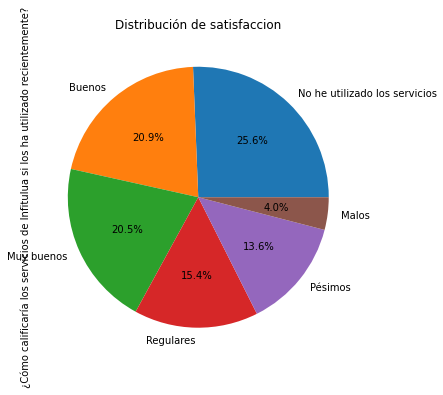

In [53]:
data_encuesta_favorabilidad_infitula.value_counts('¿Cómo calificaría los servicios de Infitulua si los ha utilizado recientemente?')/159*100

data_encuesta_favorabilidad_infitula['¿Cómo calificaría los servicios de Infitulua si los ha utilizado recientemente?'].value_counts().plot(kind='pie',autopct='%.1f%%', title='Distribución de satisfaccion')

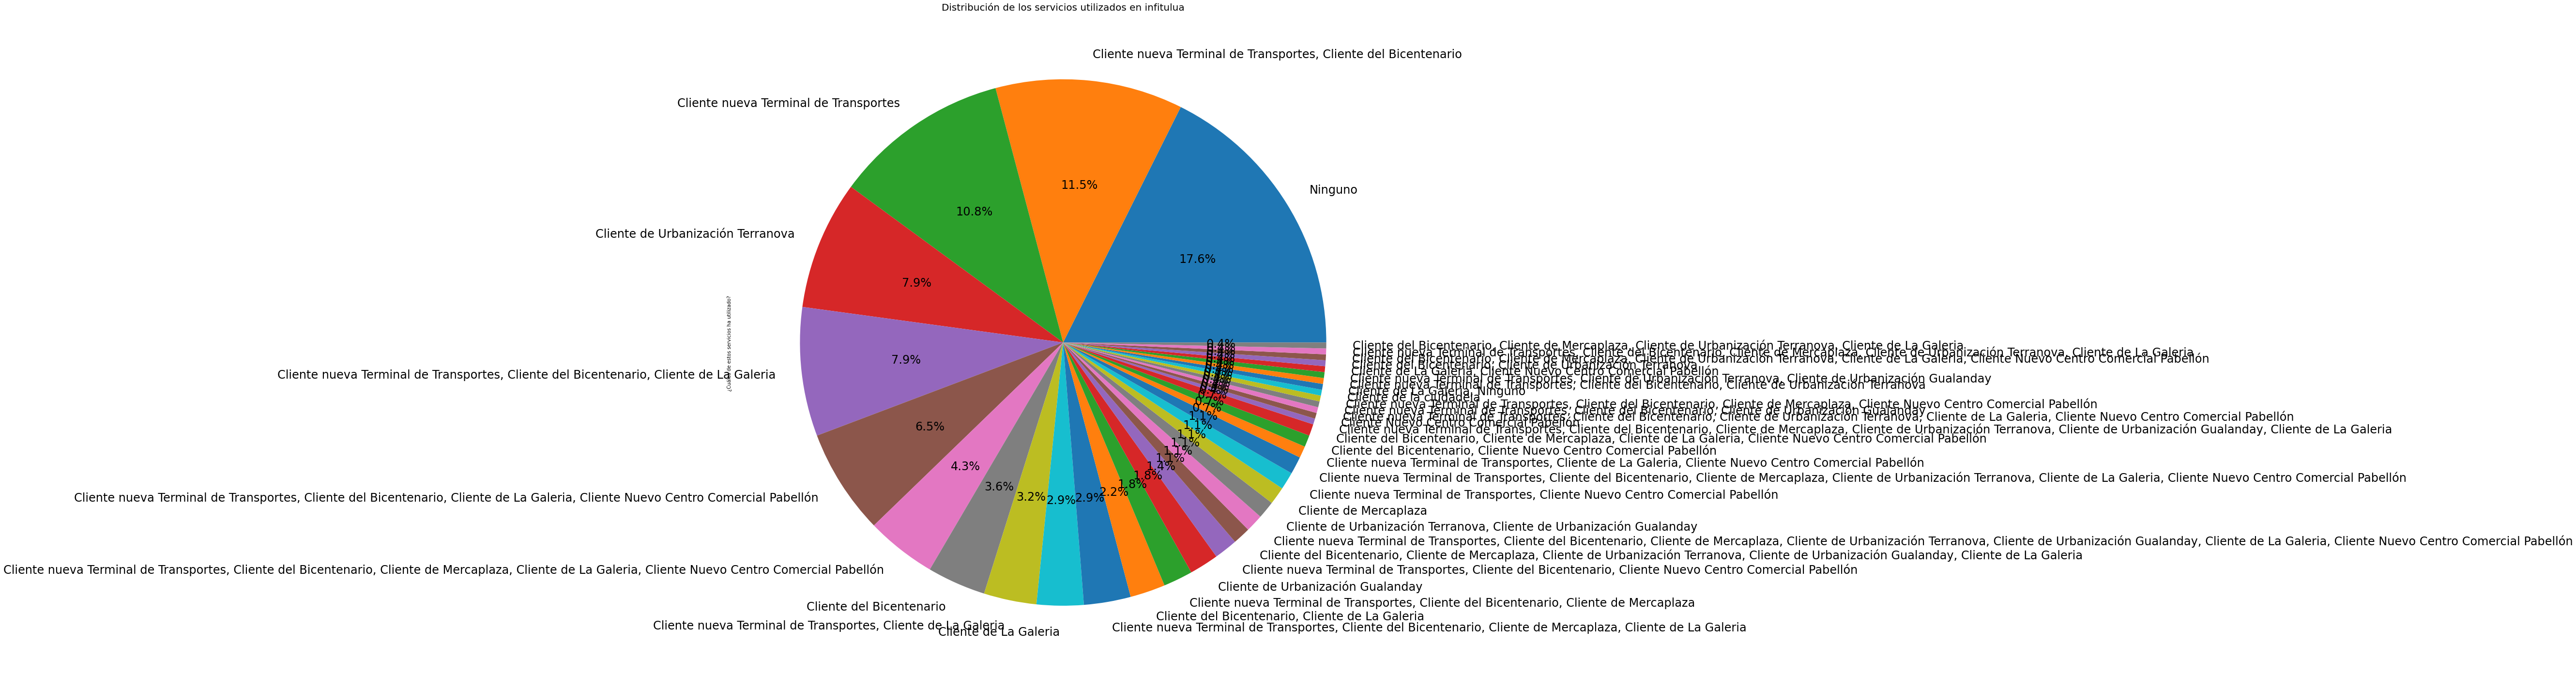

In [43]:
# Contar y calcular los porcentajes
value_counts = data_encuesta_favorabilidad_infitula['¿Cuáles de estos servicios ha utilizado? '].value_counts(normalize=True) * 100

# Duplicar el tamaño de la figura
plt.figure(figsize=(25, 25))  # Tamaño duplicado

# Crear el gráfico de pastel (pie chart) con tamaños de porcentajes aumentados
value_counts.plot(kind='pie', autopct='%.1f%%', textprops={'fontsize': 24}, title='Distribución de uso de servicios en infitulua')

# Ajustar el título de la gráfica
plt.title('Distribución de los servicios utilizados en infitulua', fontsize=20)

# Mostrar el gráfico
plt.show()

                                             Servicio  Porcentaje  Ranking
0                                             Ninguno   17.625899        1
1   Cliente nueva Terminal de Transportes, Cliente...   11.510791        2
2               Cliente nueva Terminal de Transportes   10.791367        3
3                   Cliente de Urbanización Terranova    7.913669        4
4   Cliente nueva Terminal de Transportes, Cliente...    7.913669        5
5   Cliente nueva Terminal de Transportes, Cliente...    6.474820        6
6   Cliente nueva Terminal de Transportes, Cliente...    4.316547        7
7                            Cliente del Bicentenario    3.597122        8
8   Cliente nueva Terminal de Transportes, Cliente...    3.237410        9
9                               Cliente de La Galeria    2.877698       10
10  Cliente nueva Terminal de Transportes, Cliente...    2.877698       11
11    Cliente del Bicentenario, Cliente de La Galeria    2.158273       12
12  Cliente nueva Termina

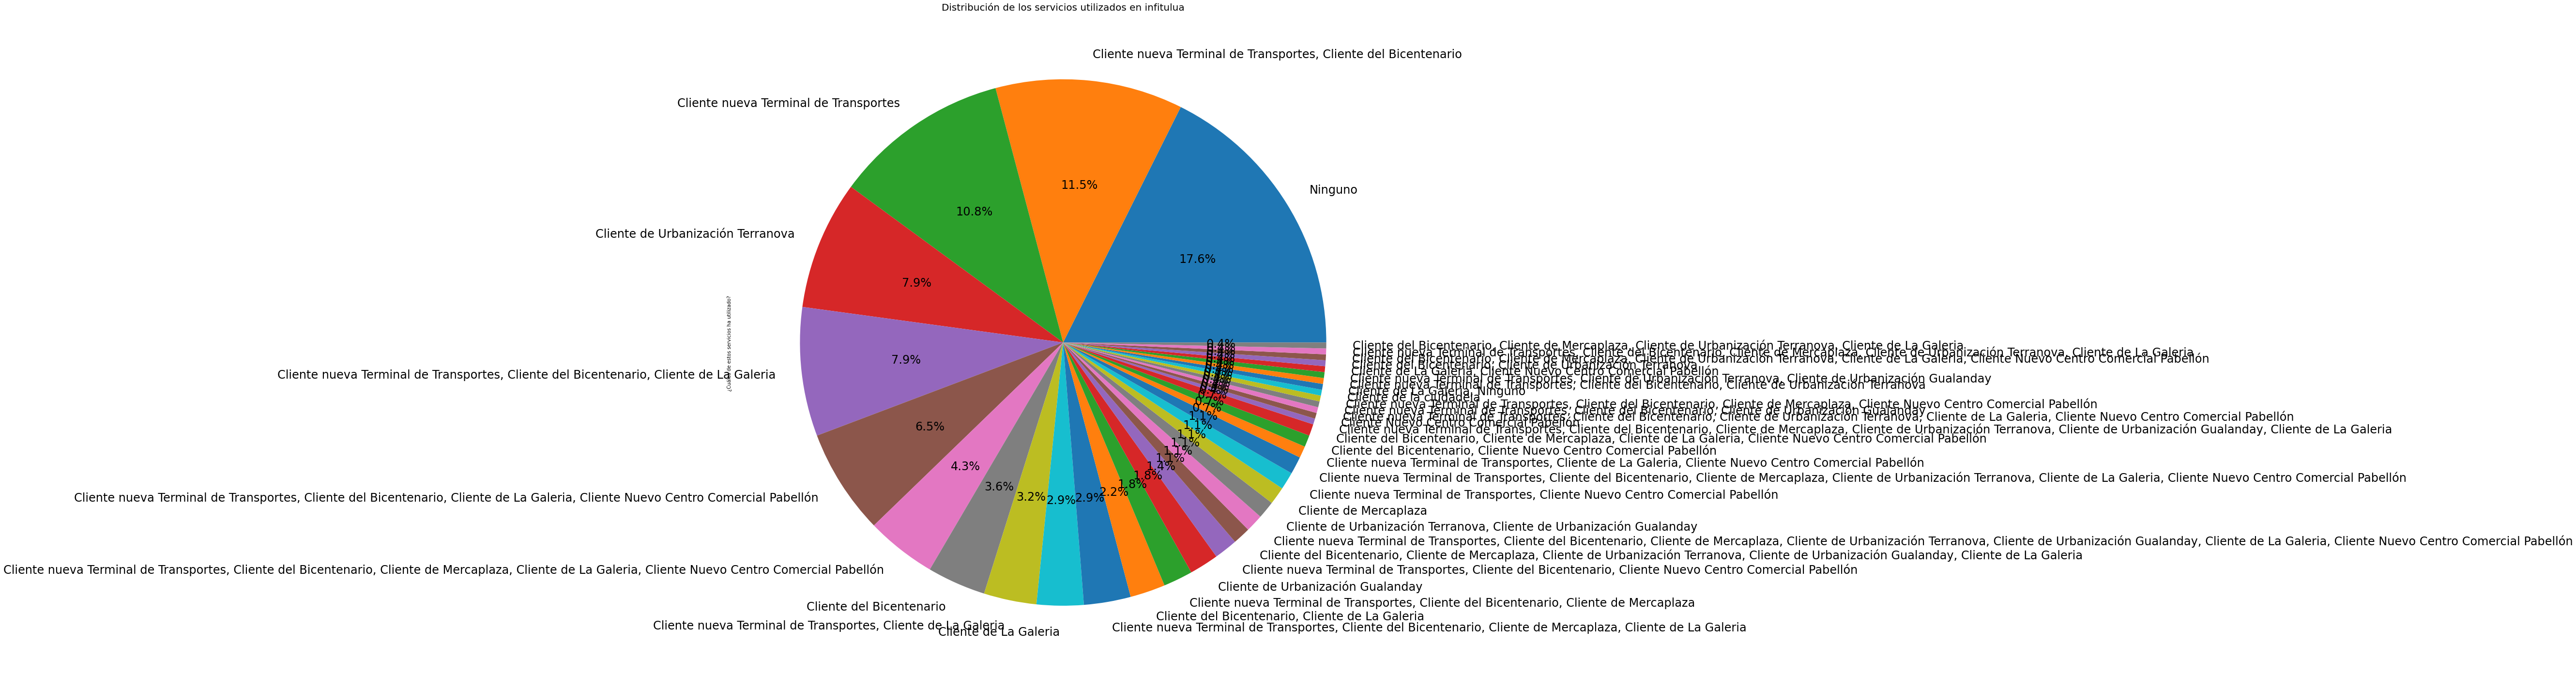

In [44]:
# Contar y calcular los porcentajes
value_counts = data_encuesta_favorabilidad_infitula['¿Cuáles de estos servicios ha utilizado? '].value_counts(normalize=True) * 100

# Crear una lista ordenada de servicios y porcentajes
sorted_services = value_counts.sort_values(ascending=False).reset_index()
sorted_services.columns = ['Servicio', 'Porcentaje']

# Agregar una columna de ranking
sorted_services['Ranking'] = sorted_services.index + 1

# Mostrar la tabla
print(sorted_services)

# Duplicar el tamaño de la figura
plt.figure(figsize=(25, 25))  # Tamaño duplicado

# Crear el gráfico de pastel (pie chart) con tamaños de porcentajes aumentados
value_counts.plot(kind='pie', autopct='%.1f%%', textprops={'fontsize': 24}, title='Distribución de uso de servicios en infitulua')

# Ajustar el título de la gráfica
plt.title('Distribución de los servicios utilizados en infitulua', fontsize=20)

# Mostrar el gráfico
plt.show()

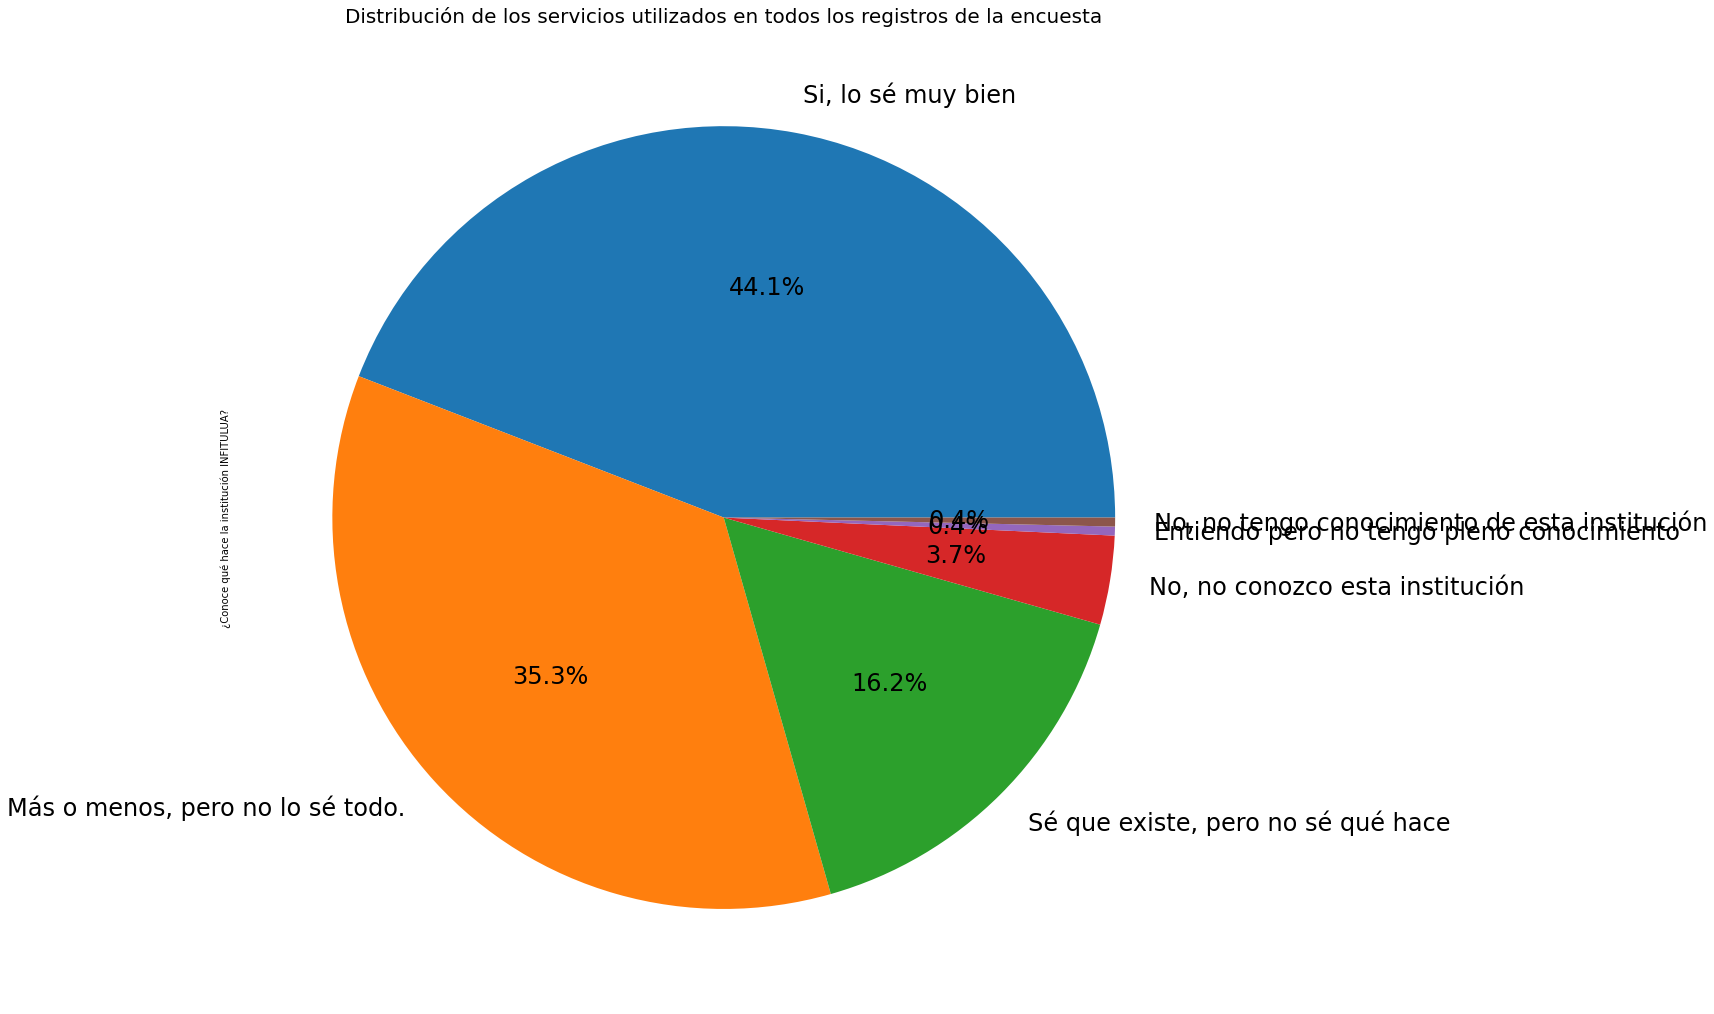

In [45]:
# Contar y calcular los porcentajes
value_counts = data_encuesta_favorabilidad_infitula['¿Conoce qué hace la institución INFITULUA?'].value_counts(normalize=True) * 100

# Duplicar el tamaño de la figura
plt.figure(figsize=(18, 18))  # Tamaño duplicado

# Crear el gráfico de pastel (pie chart) con tamaños de porcentajes aumentados
value_counts.plot(kind='pie', autopct='%.1f%%', textprops={'fontsize': 24}, title='Distribución del nivel de conocimietno en la data filtrada')

# Ajustar el título de la gráfica
plt.title('Distribución de los servicios utilizados en todos los registros de la encuesta', fontsize=20)

# Mostrar el gráfico
plt.show()

In [78]:
# Convertir la columna 'Registro' a datetime
data_encuesta_favorabilidad_infitula['Registro'] = pd.to_datetime(data_encuesta_favorabilidad_infitula['Registro'], errors='coerce')

# Definir el rango de fechas
start_date = pd.to_datetime('2024-08-24')
end_date = pd.to_datetime('2024-08-30')

# Filtrar el dataset por el rango de fechas
filtered_data = data_encuesta_favorabilidad_infitula[(data_encuesta_favorabilidad_infitula['Registro'] >= start_date) & (data_encuesta_favorabilidad_infitula['Registro'] <= end_date)]

# Mostrar el dataset filtrado
filtered_data.shape


(2, 9)

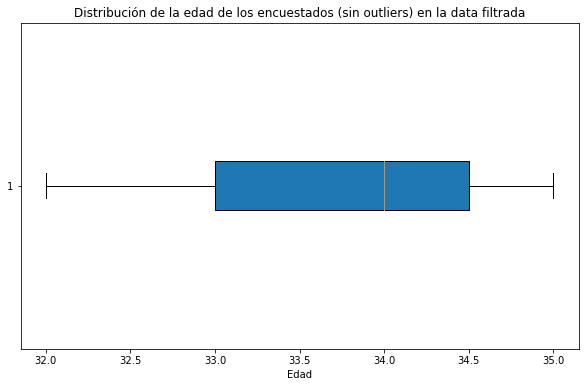

In [70]:
# Filtrar edades no nulas de la data filtrada
edades = filtered_data['Edad del encuestado'].dropna()

# Calcular los límites para identificar outliers
Q1 = edades.quantile(0.25)
Q3 = edades.quantile(0.75)
IQR = Q3 - Q1

# Limites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar datos dentro de los límites
filtered_edades = edades[(edades >= lower_bound) & (edades <= upper_bound)]

# Visualización de la columna 'Edad del encuestado' sin outliers en forma de boxplot
fig, ax = plt.subplots(figsize=(10, 6))

# Generar boxplot sin outliers
ax.boxplot(filtered_edades, vert=False, patch_artist=True)
ax.set_title('Distribución de la edad de los encuestados (sin outliers) en la data filtrada')
ax.set_xlabel('Edad')

plt.show()

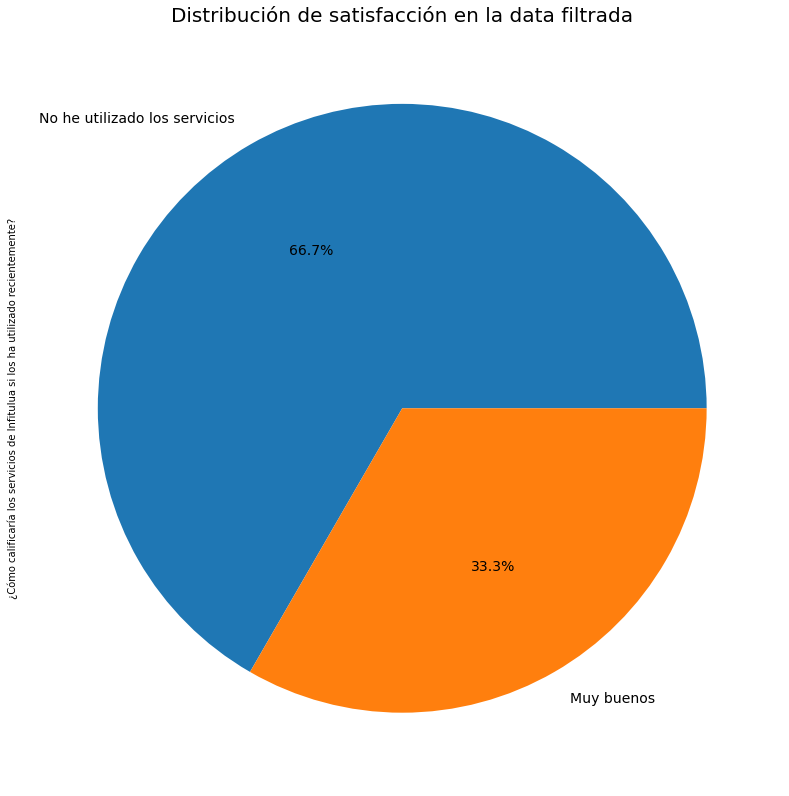

In [71]:
# Contar y calcular los porcentajes
value_counts = filtered_data['¿Cómo calificaría los servicios de Infitulua si los ha utilizado recientemente?'].value_counts(normalize=True) * 100

# Duplicar el tamaño de la figura
plt.figure(figsize=(14, 14))  # Tamaño duplicado

# Crear el gráfico de pastel (pie chart) con tamaños de porcentajes aumentados
value_counts.plot(kind='pie', autopct='%.1f%%', textprops={'fontsize': 14}, title='Distribución de satisfacción en la data filtrada')

# Ajustar el título de la gráfica
plt.title('Distribución de satisfacción en la data filtrada', fontsize=20)

# Mostrar el gráfico
plt.show()

<ipython-input-72-a4f99df23bfb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Registro'] = pd.to_datetime(filtered_data['Registro'], errors='coerce')


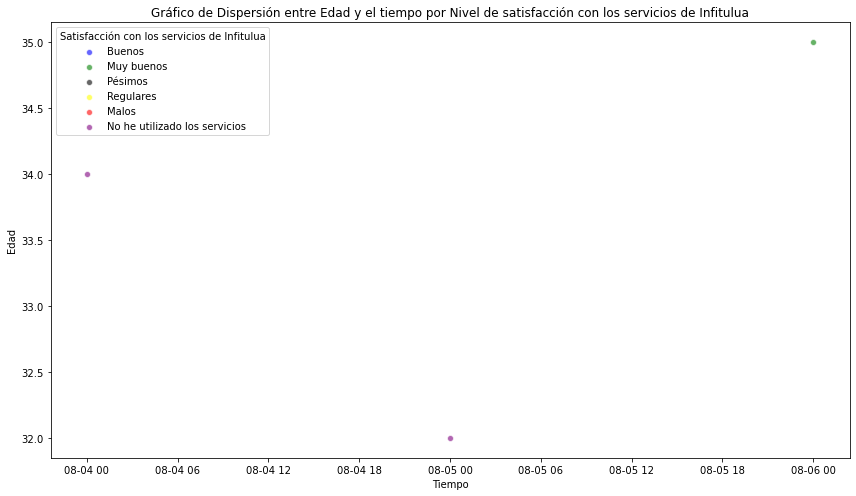

In [72]:
# Cambiar el formato del registro a datetime con la data filtrada
filtered_data['Registro'] = pd.to_datetime(filtered_data['Registro'], errors='coerce')

# Filtrar filas con valores nulos en 'Registro' o 'Edad del encuestado' data filtrada
data_encuesta_favorabilidad_infitulua_nivel_satisfaccion_filtrada_fechas = filtered_data.dropna(subset=['Registro', 'Edad del encuestado'])

# Filtrar filas donde 'Edad del encuestado' sea mayor o igual a 75
data_encuesta_favorabilidad_infitulua_nivel_satisfaccion_filtrada_fechas = data_encuesta_favorabilidad_infitulua_nivel_satisfaccion_filtrada_fechas[data_encuesta_favorabilidad_infitulua_nivel_satisfaccion_filtrada_fechas['Edad del encuestado'] <= 75]

# Definir colores para cada nivel de satisfacción
colors = {
    'Buenos': 'blue',
    'Muy buenos': 'green',
    'Pésimos': 'black',
    'Regulares': 'yellow',
    'Malos': 'red',
    'No he utilizado los servicios': 'purple'
}

# Crear el gráfico de dispersión diferenciado por nivel de satisfacción
fig, ax = plt.subplots(figsize=(12, 7))

for satisfaccion, color in colors.items():
    subset = data_encuesta_favorabilidad_infitulua_nivel_satisfaccion_filtrada_fechas[data_encuesta_favorabilidad_infitulua_nivel_satisfaccion_filtrada_fechas['¿Cómo calificaría los servicios de Infitulua si los ha utilizado recientemente?'] == satisfaccion]
    ax.scatter(subset['Registro'], subset['Edad del encuestado'], c=color, label=satisfaccion, alpha=0.6, edgecolors='white')

ax.set_title('Gráfico de Dispersión entre Edad y el tiempo por Nivel de satisfacción con los servicios de Infitulua')
ax.set_ylabel('Edad')
ax.set_xlabel('Tiempo')
ax.legend(title='Satisfacción con los servicios de Infitulua')

plt.tight_layout()
plt.show()

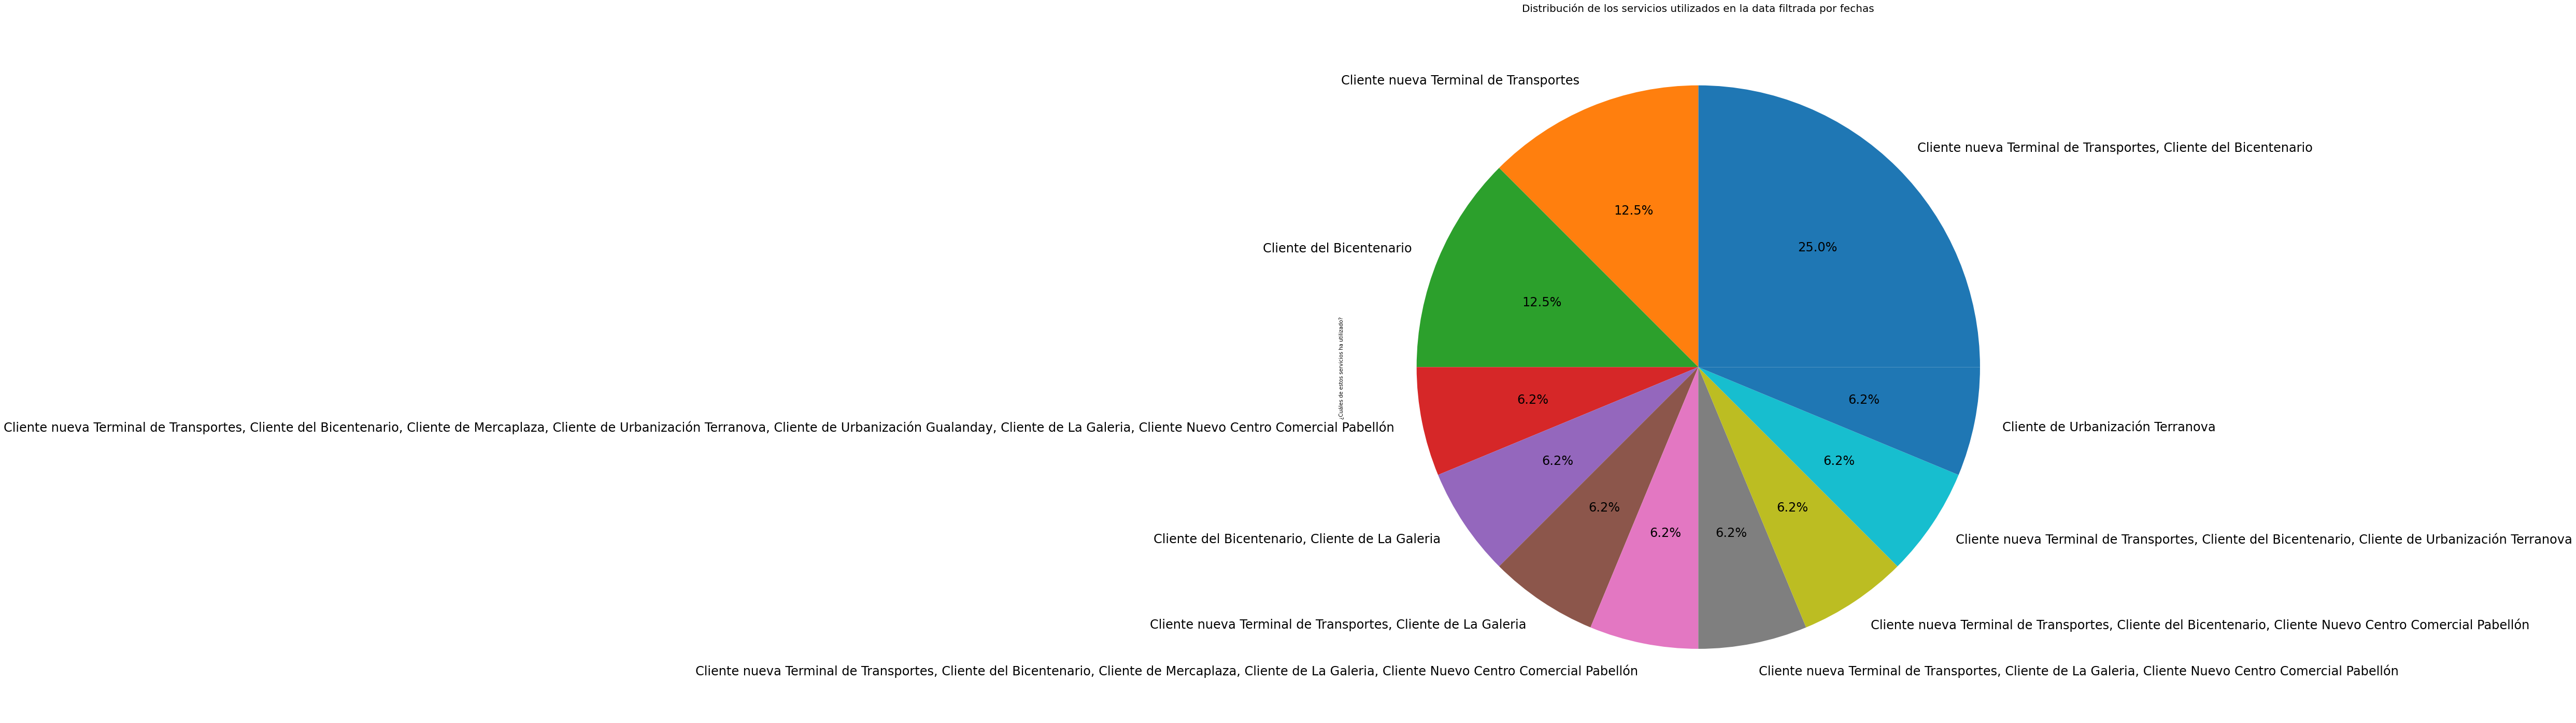

In [71]:
# Contar y calcular los porcentajes
value_counts = filtered_data['¿Cuáles de estos servicios ha utilizado? '].value_counts(normalize=True) * 100

# Duplicar el tamaño de la figura
plt.figure(figsize=(25, 25))  # Tamaño duplicado

# Crear el gráfico de pastel (pie chart) con tamaños de porcentajes aumentados
value_counts.plot(kind='pie', autopct='%.1f%%', textprops={'fontsize': 24}, title='Distribución de uso de servicios en la data filtrada')

# Ajustar el título de la gráfica
plt.title('Distribución de los servicios utilizados en la data filtrada por fechas', fontsize=20)

# Mostrar el gráfico
plt.show()

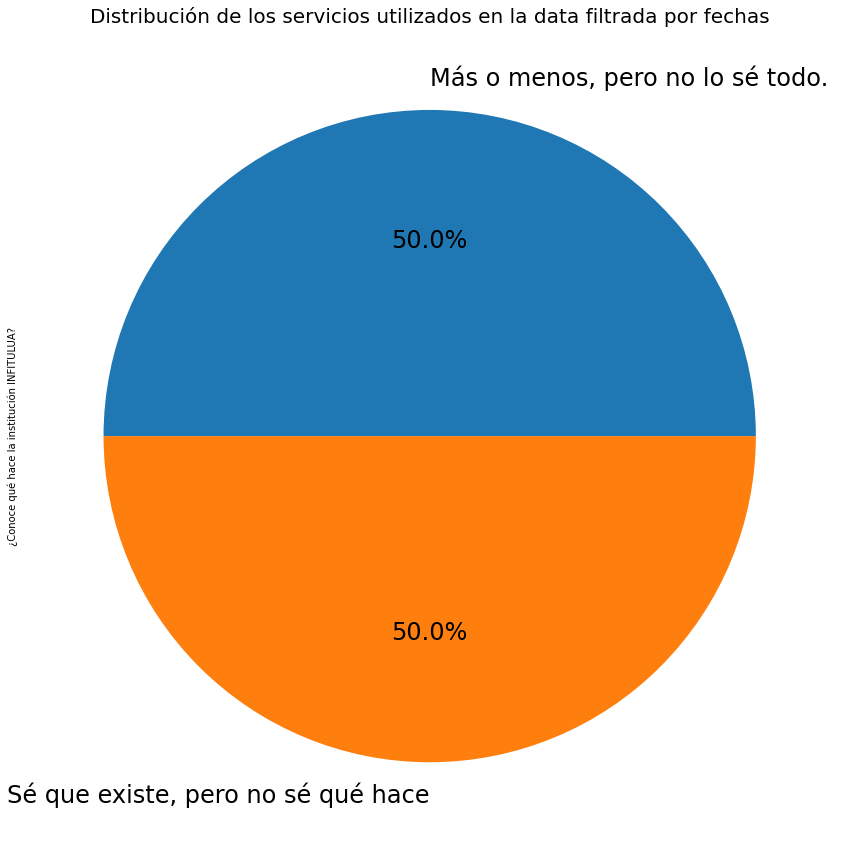

In [79]:
# Contar y calcular los porcentajes
value_counts = filtered_data['¿Conoce qué hace la institución INFITULUA?'].value_counts(normalize=True) * 100

# Duplicar el tamaño de la figura
plt.figure(figsize=(15, 15))  # Tamaño duplicado

# Crear el gráfico de pastel (pie chart) con tamaños de porcentajes aumentados
value_counts.plot(kind='pie', autopct='%.1f%%', textprops={'fontsize': 24}, title='Distribución del nivel de conocimietno en la data filtrada')

# Ajustar el título de la gráfica
plt.title('Distribución de los servicios utilizados en la data filtrada por fechas', fontsize=20)

# Mostrar el gráfico
plt.show()

In [50]:
Califiacion_servicios_nivel_conocimiento=filtered_data.groupby(['¿Conoce qué hace la institución INFITULUA?','¿Cómo calificaría los servicios de Infitulua si los ha utilizado recientemente?']).size()
Califiacion_servicios_nivel_conocimiento

¿Conoce qué hace la institución INFITULUA?  ¿Cómo calificaría los servicios de Infitulua si los ha utilizado recientemente?
Más o menos, pero no lo sé todo.            No he utilizado los servicios                                                      1
Si, lo sé muy bien                          Buenos                                                                             1
                                            Malos                                                                              1
                                            Muy buenos                                                                         1
                                            No he utilizado los servicios                                                      1
                                            Pésimos                                                                            1
                                            Regulares                                                 

In [51]:
Califiacion_servicios_nivel_conocimiento = Califiacion_servicios_nivel_conocimiento.reset_index()
Califiacion_servicios_nivel_conocimiento

,¿Conoce qué hace la institución INFITULUA?,¿Cómo calificaría los servicios de Infitulua si los ha utilizado recientemente?,0
0,"Más o menos, pero no lo sé todo.",No he utilizado los servicios,1
1,"Si, lo sé muy bien",Buenos,1
2,"Si, lo sé muy bien",Malos,1
3,"Si, lo sé muy bien",Muy buenos,1
4,"Si, lo sé muy bien",No he utilizado los servicios,1
5,"Si, lo sé muy bien",Pésimos,1
6,"Si, lo sé muy bien",Regulares,1


In [52]:
Califiacion_servicios_nivel_conocimiento =pd.pivot_table(Califiacion_servicios_nivel_conocimiento,columns='¿Cómo calificaría los servicios de Infitulua si los ha utilizado recientemente?', index='¿Conoce qué hace la institución INFITULUA?',values=0)
Califiacion_servicios_nivel_conocimiento

¿Cómo calificaría los servicios de Infitulua si los ha utilizado recientemente?,Buenos,Malos,Muy buenos,No he utilizado los servicios,Pésimos,Regulares
¿Conoce qué hace la institución INFITULUA?,,,,,,
"Más o menos, pero no lo sé todo.",NaN,NaN,NaN,1.0,NaN,NaN
"Si, lo sé muy bien",1.0,1.0,1.0,1.0,1.0,1.0


In [49]:
Califiacion_servicios_nivel_conocimiento.plot(kind='bar',title='Calificacion de servicios por nivel de conocimiento',figsize=(14,10))

NameError: name 'Califiacion_servicios_nivel_conocimiento' is not defined

In [26]:
data_instagram_historias_infitulua

,Identificador de la publicación,Identificador de la cuenta,Nombre de usuario de la cuenta,Nombre de la cuenta,Descripción,Duración (segundos),Hora de publicación,Enlace permanente,Tipo de publicación,Comentario sobre los datos,Fecha,Impresiones,Alcance,Veces que se compartió,Respuestas,Navegación,Visitas al perfil,Clics en el enlace
0,17970542828636594,17841400356362656,infitulua,INFITULUÁ E.I.C.E,NaN,15,09/02/2024 13:09,NaN,Historia de Instagram,NaN,Total,65,63,0,0,86,2.0,2.0
1,17905797342010920,17841400356362656,infitulua,INFITULUÁ E.I.C.E,Avanzamos en la entrega de los proyectos a nue...,15,09/02/2024 09:09,NaN,Historia de Instagram,NaN,Total,117,113,0,1,125,5.0,NaN
2,17863506261160796,17841400356362656,infitulua,INFITULUÁ E.I.C.E,Continuamos en la feria Dando a conocer los di...,10,09/14/2024 14:09,NaN,Historia de Instagram,NaN,Total,185,183,0,0,204,NaN,NaN
3,18067329073615024,17841400356362656,infitulua,INFITULUÁ E.I.C.E,En la muestra empresarial del Café También es...,15,09/14/2024 09:09,NaN,Historia de Instagram,NaN,Total,124,119,0,1,152,8.0,NaN
4,18016360322301223,17841400356362656,infitulua,INFITULUÁ E.I.C.E,NaN,13,09/14/2024 07:09,NaN,Historia de Instagram,NaN,Total,115,109,0,0,135,NaN,NaN
5,18037622672127988,17841400356362656,infitulua,INFITULUÁ E.I.C.E,¡También hacemos presencia en la Ruta de la Fe...,7,09/14/2024 07:09,NaN,Historia de Instagram,NaN,Total,111,109,0,0,103,NaN,NaN
6,17981003843685826,17841400356362656,infitulua,INFITULUÁ E.I.C.E,Te esperamos hoy! En ¡Con la Ruta de la Felici...,9,09/14/2024 07:09,NaN,Historia de Instagram,NaN,Total,290,267,0,0,116,NaN,NaN
7,18036903887121466,17841400356362656,infitulua,INFITULUÁ E.I.C.E,NaN,15,09/13/2024 14:09,NaN,Historia de Instagram,NaN,Total,76,72,0,0,93,1.0,NaN
8,18011059742628412,17841400356362656,infitulua,INFITULUÁ E.I.C.E,Hoy en: C❤️razones de Infi,22,09/13/2024 10:09,https://instagram.com/stories/infitulua/345633...,Historia de Instagram,NaN,Total,86,81,0,0,105,1.0,NaN
9,18241281577286325,17841400356362656,infitulua,INFITULUÁ E.I.C.E,Nos encontramos en Ciudadela Regional del Come...,15,09/13/2024 07:09,NaN,Historia de Instagram,NaN,Total,492,459,0,0,92,NaN,NaN


In [27]:
data_instagram_historias_infitulua.describe()

,Identificador de la publicación,Identificador de la cuenta,Duración (segundos),Comentario sobre los datos,Impresiones,Alcance,Veces que se compartió,Respuestas,Navegación,Visitas al perfil,Clics en el enlace
count,2.600000e+01,2.600000e+01,26.000000,0.0,26.000000,26.000000,26.000000,26.000000,26.000000,15.000000,4.000000
mean,1.806231e+16,1.784140e+16,16.807692,NaN,176.807692,166.038462,0.307692,0.269231,113.961538,1.866667,2.250000
std,1.304425e+14,1.223765e+01,10.095620,NaN,169.931991,152.509536,0.884047,0.603834,41.952812,1.995232,1.258306
min,1.786351e+16,1.784140e+16,0.000000,NaN,60.000000,58.000000,0.000000,0.000000,63.000000,1.000000,1.000000
25%,1.800735e+16,1.784140e+16,15.000000,NaN,76.250000,73.250000,0.000000,0.000000,85.250000,1.000000,1.750000
50%,1.803726e+16,1.784140e+16,15.000000,NaN,111.500000,109.000000,0.000000,0.000000,104.000000,1.000000,2.000000
75%,1.806723e+16,1.784140e+16,15.000000,NaN,177.500000,172.500000,0.000000,0.000000,135.000000,1.500000,2.500000
max,1.845999e+16,1.784140e+16,54.000000,NaN,740.000000,661.000000,3.000000,2.000000,245.000000,8.000000,4.000000


In [3]:
data_instagram_historias_infitulua.shape

(136, 20)

In [13]:
df_unified

,Identificador de la publicación,Identificador de la página,Nombre de la página,Título,Descripción,Duración (segundos),Hora de publicación,Tipo de subtítulo,Enlace permanente,Es una publicación cruzada,...,Total de clics,Clics de otro tipo,Consumo de segmentación del público coincidente (Photo Click),Clics en el enlace,REELS_PLAYS:COUNT,Segundos reproducidos,Segundos en promedio reproducidos,Ingresos estimados (USD),Impresiones del anuncio,Fecha de publicación
0,122136337148249234,61557477032777,Infitulua,Seguimos trabajando en recuperar los proyectos...,Seguimos trabajando en recuperar los proyectos...,52,2024-06-11 07:06:00,uploaded,https://www.facebook.com/reel/1889530444841513/,0,...,0.0,NaN,NaN,NaN,393.0,5318.462,15.971,0.0,0.0,2024-06-11
1,122135097740249234,61557477032777,Infitulua,⭐ ¡Hemos soñado y lo hacemos realidad!\n\n😊 En...,⭐ ¡Hemos soñado y lo hacemos realidad!\n\n😊 En...,45,2024-06-06 05:06:00,uploaded,https://www.facebook.com/reel/2788139941350291/,0,...,0.0,NaN,NaN,NaN,412.0,3609.292,10.167,0.0,0.0,2024-06-06
2,122140382696249234,61557477032777,Infitulua,¿Sabías que la Función Pública guía sobre los ...,NaN,0,2024-06-27 09:06:00,NaN,https://www.facebook.com/permalink.php?story_f...,0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-06-27
3,122144048438249234,61557477032777,Infitulua,¡Las condiciones van a mejorar para Bicentenar...,¡Las condiciones van a mejorar para Bicentenar...,45,2024-07-11 16:07:00,NaN,https://www.facebook.com/reel/775855767961996/,0,...,0.0,NaN,NaN,NaN,729.0,5788.751,8.784,0.0,0.0,2024-07-11
4,122141629928249234,61557477032777,Infitulua,¡Soluciones de vivienda y comercio para Tuluá!...,¡Soluciones de vivienda y comercio para Tuluá!...,58,2024-07-02 10:07:00,NaN,https://www.facebook.com/reel/1125374155213469/,0,...,0.0,NaN,NaN,NaN,435.0,4615.322,11.480,0.0,0.0,2024-07-02
5,122147735774249234,61557477032777,Infitulua,"Comuna 5 de Tuluá, tu opinión es muy important...",NaN,0,2024-07-27 05:07:00,NaN,https://www.facebook.com/permalink.php?story_f...,0,...,95.0,66.0,17.0,12.0,NaN,NaN,NaN,NaN,NaN,2024-07-27
6,122147730998249234,61557477032777,Infitulua,"Si vives en la Comuna 5 de Tuluá, nos encantar...",NaN,0,2024-07-27 05:07:00,NaN,https://www.facebook.com/permalink.php?story_f...,0,...,6.0,4.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2024-07-27
7,122147325152249234,61557477032777,Infitulua,Te invitamos a participar de la Expo Vivienda ...,NaN,0,2024-07-25 08:07:00,NaN,https://www.facebook.com/permalink.php?story_f...,0,...,7.0,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-07-25
8,122146879646249234,61557477032777,Infitulua,¡Tulueño que se respete: Es fan de nuestra gal...,¡Tulueño que se respete: Es fan de nuestra gal...,41,2024-07-23 08:07:00,NaN,https://www.facebook.com/reel/1194494945068184/,0,...,0.0,NaN,NaN,NaN,366.0,3025.343,9.251,0.0,0.0,2024-07-23
9,122146723832249234,61557477032777,Infitulua,¡Volvemos a los proyectos de Ciudad!\n\nEn el ...,NaN,0,2024-07-22 14:07:00,NaN,https://www.facebook.com/permalink.php?story_f...,0,...,6.0,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-07-22


In [10]:
# Asegurarse de que la columna 'Hora de publicación' esté en formato datetime
df_unified['Hora de publicación'] = pd.to_datetime(df_unified['Hora de publicación'], errors='coerce')

# Crear una nueva columna con solo la fecha (sin hora) para agrupar por día
df_unified['Fecha de publicación'] = df_unified['Hora de publicación'].dt.date

# Agrupar por día y contar el número de publicaciones
publicaciones_por_dia = df_unified.groupby('Fecha de publicación').size()

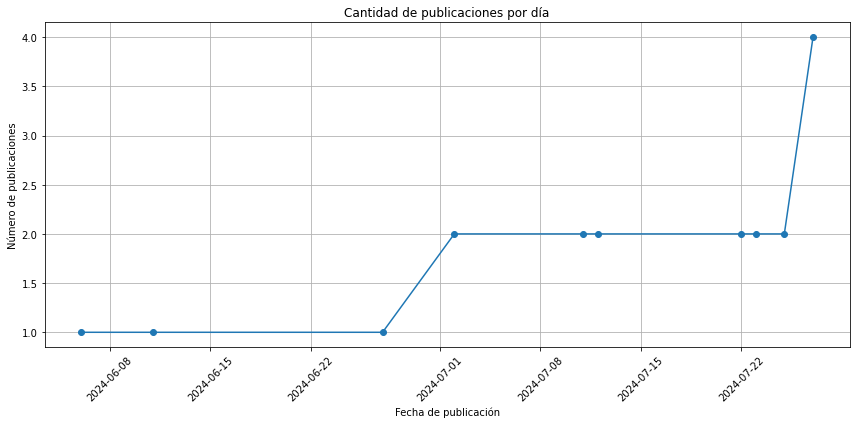

In [11]:
# Graficar la cantidad de publicaciones por día
plt.figure(figsize=(12, 6))
publicaciones_por_dia.plot(kind='line', marker='o')
plt.title('Cantidad de publicaciones por día')
plt.xlabel('Fecha de publicación')
plt.ylabel('Número de publicaciones')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 864x432 with 0 Axes>

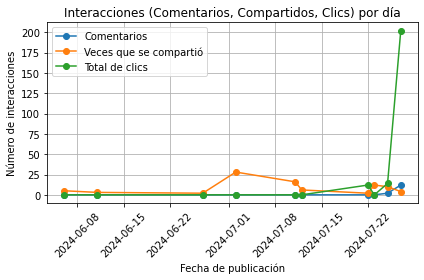

In [14]:
# Análisis de interacciones por día
interacciones_por_dia = df_unified.groupby('Fecha de publicación').agg({
    'Comentarios': 'sum',
    'Veces que se compartió': 'sum',
    'Total de clics': 'sum'
})

# Graficar interacciones por día
plt.figure(figsize=(12, 6))
interacciones_por_dia.plot(kind='line', marker='o')
plt.title('Interacciones (Comentarios, Compartidos, Clics) por día')
plt.xlabel('Fecha de publicación')
plt.ylabel('Número de interacciones')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

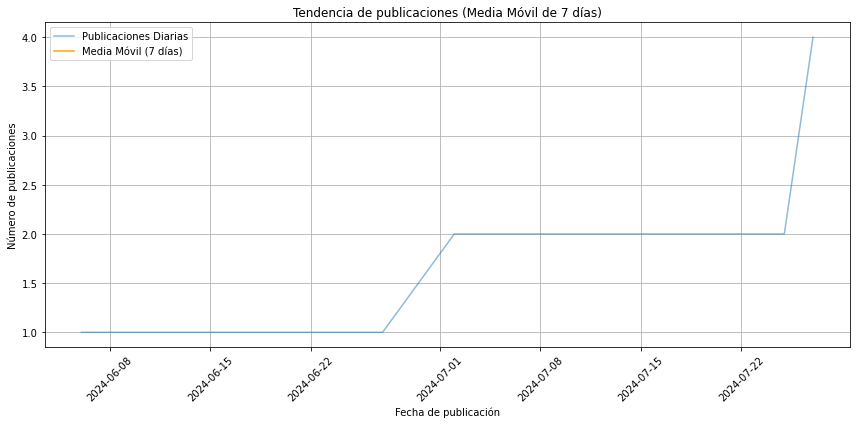

In [15]:
# Opcional: Calcular tendencia a lo largo del tiempo usando una media móvil
df_unified['Publicaciones_mov_avg'] = publicaciones_por_dia.rolling(window=7).mean()

# Graficar la tendencia de la media móvil de las publicaciones
plt.figure(figsize=(12, 6))
publicaciones_por_dia.plot(kind='line', alpha=0.5, label='Publicaciones Diarias')
df_unified['Publicaciones_mov_avg'].plot(kind='line', color='orange', label='Media Móvil (7 días)')
plt.title('Tendencia de publicaciones (Media Móvil de 7 días)')
plt.xlabel('Fecha de publicación')
plt.ylabel('Número de publicaciones')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [50]:
data_primeros_15_varios_meses = pd.read_csv('Facebook/Datos_fusionados_con_septiembre_y_ordenados.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Facebook/Datos_fusionados_con_septiembre_y_ordenados.csv'

In [68]:
# Especifica las rutas de tus archivos locales
file_paths = [
    'Informe_recopilatorio_definitivo/Facebook/Apr-01-2024_Apr-28-2024_1361127674586847.csv',
    'Informe_recopilatorio_definitivo/Facebook/Apr-30-2024_Jun-01-2024_394539256872761.csv',
    'Informe_recopilatorio_definitivo/Facebook/May-31-2024_Jul-01-2024_1380827452765062.csv',
    'Informe_recopilatorio_definitivo/Facebook/Jun-30-2024_Jul-30-2024_1465458667508063.csv',
    'Informe_recopilatorio_definitivo/Facebook/Jul-31-2024_Sep-01-2024_1022901402660101.csv',
    'Informe_recopilatorio_definitivo/Facebook/Sep-01-2024_Sep-15-2024_2227887867574116.csv'
]
# Leer y combinar los archivos en un solo DataFrame
dfs = [pd.read_csv(file) for file in file_paths]
combined_df = pd.concat(dfs, ignore_index=True)

# Asegurarse de que la columna 'Hora de publicación' sea de tipo datetime
combined_df['Hora de publicación'] = pd.to_datetime(combined_df['Hora de publicación'], errors='coerce')

# Eliminar registros con fechas duplicadas, manteniendo solo la primera aparición
combined_df_clean = combined_df.drop_duplicates(subset=['Hora de publicación'])

# Ordenar los datos por la columna 'Hora de publicación'
combined_df_sorted = combined_df_clean.sort_values(by='Hora de publicación')

# Filtrar para asegurarse de que los datos estén entre el 31 de mayo y el 24 de septiembre
start_date = '2024-04-01'
end_date = '2024-09-25'
combined_df_filtered = combined_df_sorted[
    (combined_df_sorted['Hora de publicación'] >= start_date) & 
    (combined_df_sorted['Hora de publicación'] <= end_date)
]

# Exportar el archivo combinado y filtrado a un nuevo CSV
output_path = 'C:/Users/isabe/Desktop/DataMetrics/Data Mining/Informes de redes sociales/Infitulua/Informe_recopilatorio_definitivo/Facebook/archivo_combined_filtrado_face_infi.csv'
combined_df_filtered.to_csv(output_path, index=False)

print(f'Archivo combinado y filtrado guardado en: {output_path}')


Archivo combinado y filtrado guardado en: C:/Users/isabe/Desktop/DataMetrics/Data Mining/Informes de redes sociales/Infitulua/Informe_recopilatorio_definitivo/Facebook/archivo_combined_filtrado_face_infi.csv


KeyError: 'Reproducciones'

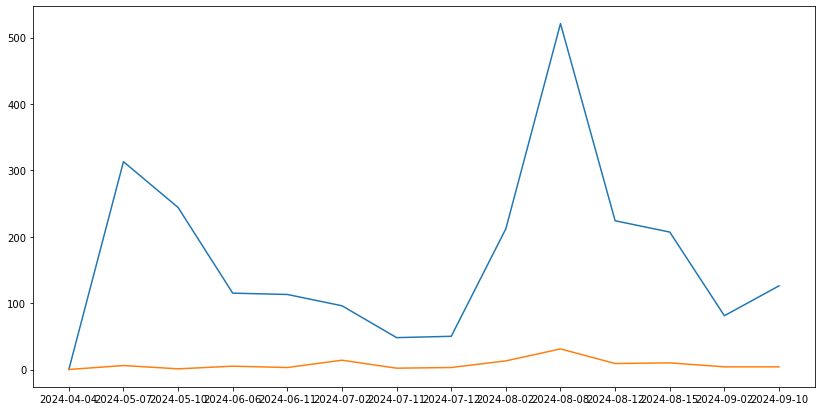

In [48]:
# Cargar el dataset
data_primeros_15_varios_meses = pd.read_csv('Informe_recopilatorio_definitivo/Facebook/archivo_combined_filtrado_face_infi.csv')

# Asegurarse de que la columna 'Hora de publicación' sea de tipo datetime
data_primeros_15_varios_meses['Hora de publicación'] = pd.to_datetime(data_primeros_15_varios_meses['Hora de publicación'])

# Filtrar los primeros 15 días de cada mes
data_primeros_15 = data_primeros_15_varios_meses[data_primeros_15_varios_meses['Hora de publicación'].dt.day <= 15]

# Crear columnas de interés
columnas_interes = ['Alcance', 'Veces que se compartió', 'Reproducciones', 'Me gusta', 'Comentarios', 'Seguimientos']

# Graficar cada columna de interés
plt.figure(figsize=(14, 7))

for columna in columnas_interes:
    # Agrupar por día y sumar los valores para obtener los datos de los primeros 15 días de cada mes
    data_agrupada = data_primeros_15.groupby(data_primeros_15['Hora de publicación'].dt.strftime('%Y-%m-%d')).sum()

    # Seleccionar los primeros 15 días
    data_agrupada = data_agrupada.head(15)

    # Graficar los datos
    plt.plot(data_agrupada.index, data_agrupada[columna], label=columna)

# Añadir etiquetas y título
plt.xlabel('Día del mes')
plt.ylabel('Valores')
plt.title('Movimiento de valores en los primeros 15 días de cada mes')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar gráfico
plt.show()


In [49]:
# Asegurarse de que la columna 'Hora de publicación' sea de tipo datetime
data_primeros_15_varios_meses['Hora de publicación'] = pd.to_datetime(data_primeros_15_varios_meses['Hora de publicación'])

# Filtrar solo los primeros 15 días de cada mes
data_primeros_15 = data_primeros_15_varios_meses[data_primeros_15_varios_meses['Hora de publicación'].dt.day <= 15]

# Crear una columna para el mes en formato 'YYYY-MM'
data_primeros_15['Mes'] = data_primeros_15['Hora de publicación'].dt.strftime('%Y-%m')

# Graficar los primeros 15 días de cada mes para la columna 'Me gusta'
plt.figure(figsize=(14, 7))

# Iterar sobre cada mes
for mes in data_primeros_15['Mes'].unique():
    # Filtrar los datos para el mes actual
    datos_mes = data_primeros_15[data_primeros_15['Mes'] == mes]
    
    # Asegurarse de que los días estén ordenados
    datos_mes = datos_mes.sort_values(by='Hora de publicación')
    
    # Graficar los valores de 'Me gusta' para los primeros 15 días del mes
    plt.plot(datos_mes['Hora de publicación'].dt.day, datos_mes['Me gusta'], label=mes)

# Añadir etiquetas y título
plt.xlabel('Día del mes')
plt.ylabel('Me gusta')
plt.title('Evolución de "Me gusta" en los primeros 15 días de cada mes')
plt.legend(title='Mes')
plt.grid(True)
plt.xticks(range(1, 16))  # Limitar el eje X a los días del 1 al 15
plt.tight_layout()

# Mostrar gráfico
plt.show()

<ipython-input-49-e874e9120317>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_primeros_15['Mes'] = data_primeros_15['Hora de publicación'].dt.strftime('%Y-%m')


KeyError: 'Me gusta'

<Figure size 1008x504 with 0 Axes>

In [107]:
data_ultimos_3_meses_facebook_infitulua = pd.read_csv('Informe_recopilatorio_definitivo/Facebook/archivo_combined_filtrado_face_infi.csv')
data_ultimos_3_meses_facebook_infitulua

,Identificador de la publicación,Identificador de la página,Nombre de la página,Título,Descripción,Duración (segundos),Hora de publicación,Tipo de subtítulo,Enlace permanente,Es una publicación cruzada,...,Total de clics,Consumo de segmentación del público coincidente (Photo Click),Clics de otro tipo,Clics en el enlace,REELS_PLAYS:COUNT,Segundos reproducidos,Segundos en promedio reproducidos,Ingresos estimados (USD),Impresiones del anuncio,Comentarios negativos de los usuarios: Ocultar todo
0,122115123692249234,265444519983436,Infitulua,NaN,NaN,0,2024-04-04 08:04:00,NaN,https://www.facebook.com/photo.php?fbid=122115...,0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,122121089432249234,265444519983436,Infitulua,NaN,🔈 ¡Tu opinión cuenta! En INFITULUA nos importa...,0,2024-04-17 08:04:00,NaN,https://www.facebook.com/permalink.php?story_f...,0,...,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,122127123158249234,61557477032777,Infitulua,"El Instituto de Financiamiento, Promoción y De...",NaN,0,2024-05-07 06:05:00,NaN,https://www.facebook.com/permalink.php?story_f...,0,...,4.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1494981904734763,61557477032777,Infitulua,RENDICIÓN DE CUENTAS 100 DÍAS - 2024,Rendición de cuentas - 2024,2637,2024-05-10 15:05:00,uploaded,https://www.facebook.com/61557477032777/videos...,0,...,NaN,NaN,NaN,NaN,275.0,30238.939,167.994,0.0,NaN,NaN
4,122135097740249234,265444519983436,Infitulua,NaN,⭐ ¡Hemos soñado y lo hacemos realidad!\n\n😊 En...,45,2024-06-06 05:06:00,uploaded,https://www.facebook.com/permalink.php?story_f...,0,...,0.0,NaN,NaN,NaN,264.0,2153.888,9.658,NaN,0.0,NaN
5,122136337148249234,265444519983436,Infitulua,NaN,Seguimos trabajando en recuperar los proyectos...,52,2024-06-11 07:06:00,uploaded,https://www.facebook.com/permalink.php?story_f...,0,...,0.0,NaN,NaN,NaN,239.0,3348.430,16.658,NaN,0.0,NaN
6,122138124062249234,265444519983436,Infitulua,NaN,"Somos el Instituto de Financiamiento, Promoció...",0,2024-06-18 14:06:00,NaN,https://www.facebook.com/permalink.php?story_f...,0,...,975.0,359.0,613.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
7,122140382696249234,265444519983436,Infitulua,NaN,¿Sabías que la Función Pública guía sobre los ...,0,2024-06-27 09:06:00,NaN,https://www.facebook.com/permalink.php?story_f...,0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,122140848770249234,265444519983436,Infitulua,NaN,¿Ya sabes qué es el Instituto de Financiamient...,0,2024-06-29 08:06:00,NaN,https://www.facebook.com/permalink.php?story_f...,0,...,17.0,6.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
9,122141629928249234,61557477032777,Infitulua,¡Soluciones de vivienda y comercio para Tuluá!...,¡Soluciones de vivienda y comercio para Tuluá!...,58,2024-07-02 10:07:00,NaN,https://www.facebook.com/permalink.php?story_f...,0,...,0.0,NaN,NaN,NaN,331.0,3615.227,11.892,NaN,0.0,NaN


  Hora de publicación  Impresiones  Total de clics  Veces que se compartió  \
0 2024-04-04 08:04:00          0.0             0.0                       0   
1 2024-04-17 08:04:00         37.0             2.0                       0   
2 2024-05-07 06:05:00        436.0             4.0                       6   
3 2024-05-10 15:05:00        294.5             2.0                       1   
4 2024-06-06 05:06:00        153.0             0.0                       5   

   Comentarios  Reacciones, comentarios y veces que se compartió  Alcance  \
0            0                                                 0        0   
1            0                                                 2       32   
2            0                                                21      313   
3            6                                                29      244   
4            0                                                17      115   

   Reacciones  
0           0  
1           2  
2          15  
3   

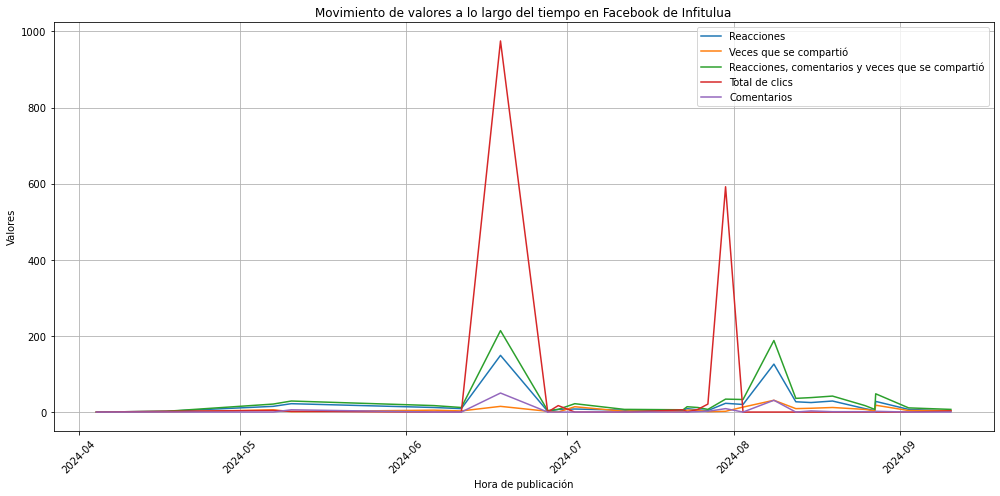

In [70]:
# Asegurarnos de que no haya espacios en los nombres de las columnas
data_ultimos_3_meses_facebook_infitulua.columns = data_ultimos_3_meses_facebook_infitulua.columns.str.strip()

# Convertir 'Hora de publicación' a formato datetime y ordenar por fecha
data_ultimos_3_meses_facebook_infitulua['Hora de publicación'] = pd.to_datetime(data_ultimos_3_meses_facebook_infitulua['Hora de publicación'], format='%Y/%m/%d', errors='coerce')
data_linea_temporal_infi_columnas_no_exploradas = data_ultimos_3_meses_facebook_infitulua.sort_values(by='Hora de publicación')

# Seleccionar columnas relevantes sin eliminar filas con valores NaN
selected_columns = ['Hora de publicación', 'Impresiones', 'Total de clics', 'Veces que se compartió', 'Comentarios', 'Reacciones, comentarios y veces que se compartió', 'Alcance', 'Reacciones']
data_linea_temporal_infi_columnas_no_exploradas = data_linea_temporal_infi_columnas_no_exploradas[selected_columns]

# Interpolar valores nulos
data_linea_temporal_infi_columnas_no_exploradas[['Impresiones', 'Alcance', 'Veces que se compartió', 'Reacciones, comentarios y veces que se compartió', 'Total de clics', 'Reacciones']] = data_linea_temporal_infi_columnas_no_exploradas[['Impresiones', 'Alcance', 'Veces que se compartió', 'Reacciones, comentarios y veces que se compartió', 'Total de clics', 'Reacciones']].interpolate()

# Mostrar datos intermedios para verificar
print(data_linea_temporal_infi_columnas_no_exploradas.head())
print(data_linea_temporal_infi_columnas_no_exploradas.tail())

# Graficar los datos
plt.figure(figsize=(14, 7))

plt.plot(data_linea_temporal_infi_columnas_no_exploradas['Hora de publicación'], 
         data_linea_temporal_infi_columnas_no_exploradas['Reacciones'], label='Reacciones')
plt.plot(data_linea_temporal_infi_columnas_no_exploradas['Hora de publicación'], 
         data_linea_temporal_infi_columnas_no_exploradas['Veces que se compartió'], label='Veces que se compartió')
plt.plot(data_linea_temporal_infi_columnas_no_exploradas['Hora de publicación'], 
         data_linea_temporal_infi_columnas_no_exploradas['Reacciones, comentarios y veces que se compartió'], label='Reacciones, comentarios y veces que se compartió')
plt.plot(data_linea_temporal_infi_columnas_no_exploradas['Hora de publicación'], 
         data_linea_temporal_infi_columnas_no_exploradas['Total de clics'], label='Total de clics')
plt.plot(data_linea_temporal_infi_columnas_no_exploradas['Hora de publicación'], 
         data_linea_temporal_infi_columnas_no_exploradas['Comentarios'], label='Comentarios')

plt.xlabel('Hora de publicación')
plt.ylabel('Valores')
plt.title('Movimiento de valores a lo largo del tiempo en Facebook de Infitulua')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar gráfico
plt.show()


In [71]:
# Encontrar el índice de la publicación con el mayor número de reacciones, comentarios y veces compartido
indice_reacciones_maximo = data_ultimos_3_meses_facebook_infitulua['Reacciones, comentarios y veces que se compartió'].idxmax()

# Obtener el identificador de la publicación con el máximo de interacciones
id_publicacion_reacciones_maximo = data_ultimos_3_meses_facebook_infitulua.loc[indice_reacciones_maximo, 'Identificador de la publicación']

# Mostrar la descripción completa de esta publicación
descripcion_reacciones_maximo = data_ultimos_3_meses_facebook_infitulua.loc[
    data_ultimos_3_meses_facebook_infitulua['Identificador de la publicación'] == id_publicacion_reacciones_maximo, 
    'Descripción'
].values[0]

# Imprimir la descripción
print(f"Descripción de la publicación con mayor cantidad de interacciones (ID: {id_publicacion_reacciones_maximo}): {descripcion_reacciones_maximo}")


Descripción de la publicación con mayor cantidad de interacciones (ID: 122138124062249234): Somos el Instituto de Financiamiento, Promoción y Desarrollo de Tuluá, INFITULUÁ. ¿Ya nos conoces?❓ 

Déjanos aquí tu comentario ⬇️

 #ParaSerFelices #Infituluá  💙


In [72]:
# Encuentra el índice de la fila con el mayor número de comentarios
indice_comentarios_maximo = data_ultimos_3_meses_facebook_infitulua['Comentarios'].idxmax()

# Obtén el identificador de la publicación con la mayor cantidad de comentarios
id_publicacion_comentarios_maximo = data_ultimos_3_meses_facebook_infitulua.loc[indice_comentarios_maximo, 'Identificador de la publicación']

# Mostrar la descripción completa de la publicación
descripcion_comentarios_maximo = data_ultimos_3_meses_facebook_infitulua.loc[
    data_ultimos_3_meses_facebook_infitulua['Identificador de la publicación'] == id_publicacion_comentarios_maximo, 
    'Descripción'
].values[0]

# Imprime la descripción de la publicación con la mayor cantidad de comentarios
print(f"Descripción de la publicación con mayor cantidad de comentarios (ID: {id_publicacion_comentarios_maximo}): {descripcion_comentarios_maximo}")


Descripción de la publicación con mayor cantidad de comentarios (ID: 122138124062249234): Somos el Instituto de Financiamiento, Promoción y Desarrollo de Tuluá, INFITULUÁ. ¿Ya nos conoces?❓ 

Déjanos aquí tu comentario ⬇️

 #ParaSerFelices #Infituluá  💙


In [73]:
# Encuentra el índice de la fila con la menor cantidad de 'Reacciones'
indice_reacciones_minimo = data_ultimos_3_meses_facebook_infitulua['Reacciones'].idxmin()

# Obtén el identificador de la publicación con la menor cantidad de 'Reacciones'
id_publicacion_reacciones_minimo = data_ultimos_3_meses_facebook_infitulua.loc[indice_reacciones_minimo, 'Identificador de la publicación']

# Imprime el identificador de la publicación con menor cantidad de 'Reacciones'
print("Identificador de la publicación con menor cantidad de 'Reacciones':", id_publicacion_reacciones_minimo)

# Encuentra la descripción correspondiente a ese identificador de publicación
descripcion_reacciones_minimo = data_ultimos_3_meses_facebook_infitulua.loc[
    data_ultimos_3_meses_facebook_infitulua['Identificador de la publicación'] == id_publicacion_reacciones_minimo, 
    'Descripción'
].values[0]

# Imprime la descripción correspondiente al ID con menor cantidad de 'Reacciones'
print(f"Descripción de la publicación con menor cantidad de 'Reacciones' (ID: {id_publicacion_reacciones_minimo}): {descripcion_reacciones_minimo}")

# Encuentra los índices de las tres publicaciones con menor cantidad de 'Reacciones'
indices_tres_menores_reacciones = data_ultimos_3_meses_facebook_infitulua['Reacciones'].nsmallest(3).index

# Obtén y convierte a string las descripciones de estas tres publicaciones
descripciones_tres_menores_reacciones = data_ultimos_3_meses_facebook_infitulua.loc[indices_tres_menores_reacciones, 'Descripción'].values

print("Descripciones de las tres publicaciones con menor cantidad de 'Reacciones' en Infitulua:")
for descripcion in descripciones_tres_menores_reacciones:
    # Convierte a string cualquier valor que no sea una cadena
    print("- " + str(descripcion))


Identificador de la publicación con menor cantidad de 'Reacciones': 122115123692249234
Descripción de la publicación con menor cantidad de 'Reacciones' (ID: 122115123692249234): nan
Descripciones de las tres publicaciones con menor cantidad de 'Reacciones' en Infitulua:
- nan
- 🔈 ¡Tu opinión cuenta! En INFITULUA nos importa conocer tu opinión. Participa en nuestra encuesta y ayudanos a mejorar nuestros servicios.

⭐️ ¡Dale clic al enlace y comparte tu opinión👇🏼

https://gersal.surveykiwi.com/8h8441krgn

LUA #OpinionImporta #MejoraContinua #tulua
- ¿Sabías que la Función Pública guía sobre los manuales de identidad institucional a través de la Ley 2345 Chao marcas de Gobierno?

En INFITULUÁ E.I.C.E. ya contamos con Manual de Identidad Corporativa 2024-2027, donde se describen las pautas y normas para el correcto uso de la marca Instituto de Financiamiento, Promoción y Desarrollo de Tuluá, en las diferentes aplicaciones físicas, impresas y digitales. 

El objetivo del manual es estandari

In [108]:
data_ultimos_3_meses_facebook_infitulua_matriz= data_ultimos_3_meses_facebook_infitulua[['Duración (segundos)','Veces que se compartió','Alcance','Reacciones, comentarios y veces que se compartió','Reacciones','Comentarios','Segundos reproducidos','Segundos en promedio reproducidos']]
data_ultimos_3_meses_facebook_infitulua_matriz

,Duración (segundos),Veces que se compartió,Alcance,"Reacciones, comentarios y veces que se compartió",Reacciones,Comentarios,Segundos reproducidos,Segundos en promedio reproducidos
0,0,0,0,0,0,0,NaN,NaN
1,0,0,32,2,2,0,NaN,NaN
2,0,6,313,21,15,0,NaN,NaN
3,2637,1,244,29,22,6,30238.939,167.994
4,45,5,115,17,12,0,2153.888,9.658
5,52,3,113,12,9,0,3348.430,16.658
6,0,15,10471,214,149,50,NaN,NaN
7,0,2,49,4,2,0,NaN,NaN
8,0,0,85,7,7,0,NaN,NaN
9,58,14,96,22,8,0,3615.227,11.892


In [75]:
data_ultimos_3_meses_facebook_infitulua_matriz.describe()

,Duración (segundos),Veces que se compartió,Alcance,"Reacciones, comentarios y veces que se compartió",Reacciones,Comentarios,Segundos reproducidos,Segundos en promedio reproducidos
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,15.000000,15.000000
mean,127.851852,6.518519,821.518519,31.185185,20.740741,3.925926,9030.232467,22.623800
std,502.367143,7.034915,2464.151568,50.852000,34.961069,11.062501,11944.239936,40.359725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1547.991000,8.027000
25%,0.000000,2.000000,69.000000,7.000000,4.500000,0.000000,2080.420500,9.791500
50%,45.000000,4.000000,115.000000,14.000000,9.000000,0.000000,3615.227000,11.892000
75%,59.500000,9.500000,220.500000,33.500000,22.500000,1.500000,9443.805500,15.759000
max,2637.000000,31.000000,10471.000000,214.000000,149.000000,50.000000,43240.447000,167.994000


<AxesSubplot:>

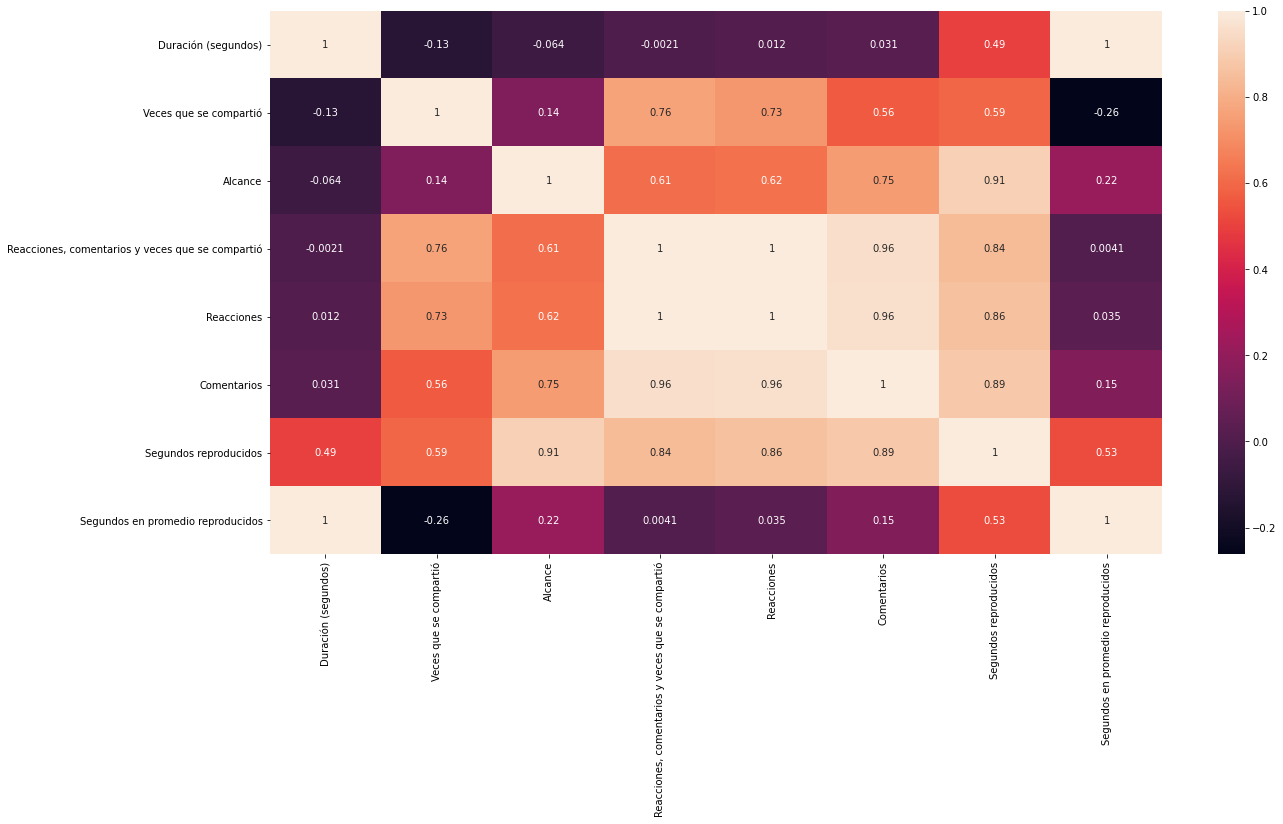

In [76]:
plt.figure(figsize=(20, 10))
sns.heatmap(data_ultimos_3_meses_facebook_infitulua_matriz.corr(),  annot=True)

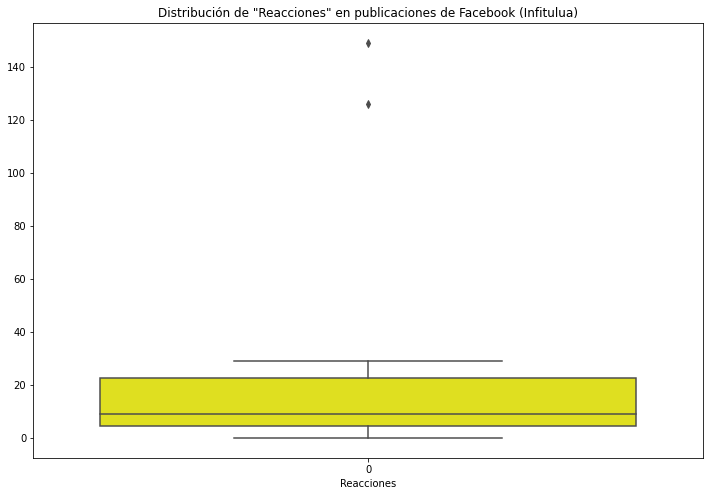

In [109]:
# Suponiendo que 'data_ultimos_3_meses_facebook_infitulua' es el DataFrame que contiene los datos relevantes
# Crear el gráfico boxplot con tamaño aumentado y color amarillo
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_ultimos_3_meses_facebook_infitulua['Reacciones'], color='yellow')
plt.title('Distribución de "Reacciones" en publicaciones de Facebook (Infitulua)')
plt.xlabel('Reacciones')
plt.show()


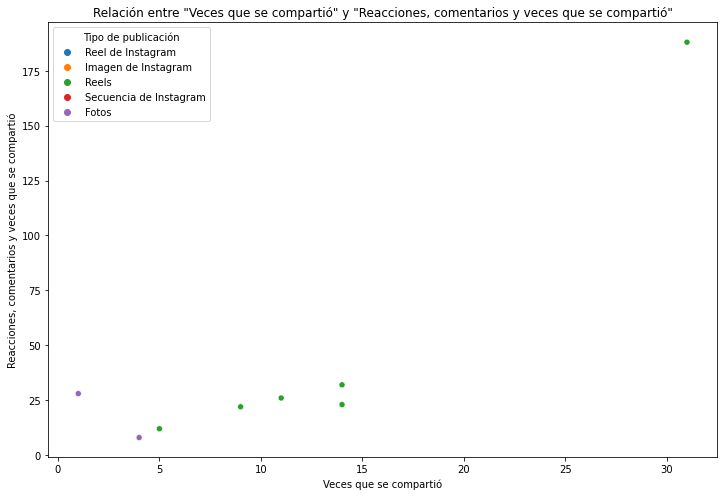

In [22]:
# Crear la gráfica de dispersión con el nuevo dataset
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=data_ultimos_3_meses_facebook_infitulua, 
    x='Veces que se compartió', 
    y='Reacciones, comentarios y veces que se compartió', 
    hue='Tipo de publicación'
)

# Añadir título y etiquetas
plt.title('Relación entre "Veces que se compartió" y "Reacciones, comentarios y veces que se compartió"')
plt.xlabel('Veces que se compartió')
plt.ylabel('Reacciones, comentarios y veces que se compartió')

# Mostrar la gráfica
plt.show()

In [92]:
# Especifica las rutas de tus archivos locales
file_paths = [
    'Informe_recopilatorio_definitivo/Instagram/Apr-01-2024_Apr-30-2024_863195835914086.csv',
    'Informe_recopilatorio_definitivo/Instagram/Apr-30-2024_May-31-2024_836509491624806.csv',
    'Informe_recopilatorio_definitivo/Instagram/May-31-2024_Jul-01-2024_1252898789006387.csv',
    'Informe_recopilatorio_definitivo/Instagram/Jun-30-2024_Aug-01-2024_497352746399132.csv',
    'Informe_recopilatorio_definitivo/Instagram/Jul-31-2024_Sep-01-2024_1558774381376805.csv',
    'Informe_recopilatorio_definitivo/Instagram/Aug-31-2024_Sep-27-2024_2623302897854248.csv'
]
# Leer y combinar los archivos en un solo DataFrame
dfs = [pd.read_csv(file) for file in file_paths]
combined_df = pd.concat(dfs, ignore_index=True)

# Asegurarse de que la columna 'Hora de publicación' sea de tipo datetime
combined_df['Hora de publicación'] = pd.to_datetime(combined_df['Hora de publicación'], errors='coerce')

# Eliminar registros con fechas duplicadas, manteniendo solo la primera aparición
combined_df_clean = combined_df.drop_duplicates(subset=['Hora de publicación'])

# Ordenar los datos por la columna 'Hora de publicación'
combined_df_sorted = combined_df_clean.sort_values(by='Hora de publicación')

# Filtrar para asegurarse de que los datos estén entre el 31 de mayo y el 24 de septiembre
start_date = '2024-04-01'
end_date = '2024-09-25'
combined_df_filtered = combined_df_sorted[
    (combined_df_sorted['Hora de publicación'] >= start_date) & 
    (combined_df_sorted['Hora de publicación'] <= end_date)
]

# Exportar el archivo combinado y filtrado a un nuevo CSV
output_path = 'C:/Users/isabe/Desktop/DataMetrics/Data Mining/Informes de redes sociales/Infitulua/Informe_recopilatorio_definitivo/Instagram/archivo_combined_filtrado_insta_infi.csv'
combined_df_filtered.to_csv(output_path, index=False)

print(f'Archivo combinado y filtrado guardado en: {output_path}')


Archivo combinado y filtrado guardado en: C:/Users/isabe/Desktop/DataMetrics/Data Mining/Informes de redes sociales/Infitulua/Informe_recopilatorio_definitivo/Instagram/archivo_combined_filtrado_insta_infi.csv


In [51]:
data_ultimos_4_meses_Instagram_infitulua = pd.read_csv('Informe_recopilatorio_definitivo/Instagram/archivo_combined_filtrado_insta_infi.csv')

In [52]:
data_ultimos_4_meses_Instagram_infitulua

,Identificador de la publicación,Identificador de la cuenta,Nombre de usuario de la cuenta,Nombre de la cuenta,Descripción,Duración (segundos),Hora de publicación,Enlace permanente,Tipo de publicación,Comentario sobre los datos,Fecha,Impresiones,Alcance,Veces que se compartió,Seguimientos,Reproducciones,Me gusta,Comentarios,Veces que se guardó
0,17921936111791481,17841400356362656,infitulua,INFITULUÁ E.I.C.E,El Ingeniero Gustavo Vélez @alcaldiadetulua fi...,47,2024-04-10 20:04:00,https://www.instagram.com/infitulua/reel/C5mz6...,Reel de Instagram,NaN,Total,1594,1328,9,3.0,2010.0,43,6,0
1,18220763401274976,17841402591799685,alcaldiadetulua,Alcaldía de Tuluá,"Desde la Alcaldía Municipal, a través de @infi...",30,2024-04-12 14:04:00,https://www.instagram.com/alcaldiadetulua/reel...,Reel de Instagram,NaN,Total,3404,3006,11,NaN,5201.0,122,3,0
2,17995616813627405,17841400356362656,infitulua,INFITULUÁ E.I.C.E,🔈 ¡Tu opinión cuenta! En INFITULUA nos importa...,0,2024-04-17 08:04:00,https://www.instagram.com/infitulua/p/C53js_au...,Imagen de Instagram,NaN,Total,14543,8107,2,2.0,NaN,61,0,1
3,18029797822957955,17841400356362656,infitulua,INFITULUÁ E.I.C.E,El equipo técnico de Infituluá trabaja con cal...,36,2024-04-22 08:04:00,https://www.instagram.com/infitulua/reel/C6EX0...,Reel de Instagram,NaN,Total,818,695,5,4.0,1078.0,39,2,0
4,17885644764041806,17841400356362656,infitulua,INFITULUÁ E.I.C.E,"El Instituto de Financiamiento, Promoción y De...",0,2024-05-07 06:05:00,https://www.instagram.com/infitulua/p/C6q2jawM...,Imagen de Instagram,NaN,Total,1652,1458,9,1.0,NaN,24,0,0
5,17857087434164790,17841400356362656,infitulua,INFITULUÁ E.I.C.E,Rendición de cuentas 100 días - 2024,3460,2024-05-10 15:05:00,https://www.instagram.com/infitulua/reel/C6ziV...,Reel de Instagram,NaN,Total,259,219,0,NaN,385.0,19,0,0
6,17965291142737929,17841402591799685,alcaldiadetulua,Alcaldía de Tuluá,¡Ven y conoce el Centro Comercial Bicentenario...,37,2024-05-21 12:05:00,https://www.instagram.com/alcaldiadetulua/reel...,Reel de Instagram,NaN,Total,1858,1460,5,NaN,2622.0,37,0,0
7,18268585090228185,17841400356362656,infitulua,INFITULUÁ E.I.C.E,¡Nuestro propósito ha revivido!\n\nDe la mano ...,125,2024-05-23 13:05:00,https://www.instagram.com/infitulua/reel/C7UvU...,Reel de Instagram,NaN,Total,1420,903,4,NaN,1164.0,19,0,0
8,18036178027934929,17841400356362656,infitulua,INFITULUÁ E.I.C.E,Nacimos para apoyar el desarrollo económico y ...,38,2024-05-24 12:05:00,https://www.instagram.com/infitulua/reel/C7XMo...,Reel de Instagram,NaN,Total,460,314,1,NaN,643.0,16,0,0
9,18438277621053011,17841400356362656,infitulua,INFITULUÁ E.I.C.E,Nuestro propósito ha tenido que batallar contr...,42,2024-05-25 11:05:00,https://www.instagram.com/infitulua/reel/C7ZsZ...,Reel de Instagram,NaN,Total,1525,1362,5,NaN,1950.0,22,3,0


  Hora de publicación  Impresiones  Alcance  Veces que se compartió  Me gusta  \
0 2024-04-10 20:04:00         1594     1328                       9        43   
1 2024-04-12 14:04:00         3404     3006                      11       122   
2 2024-04-17 08:04:00        14543     8107                       2        61   
3 2024-04-22 08:04:00          818      695                       5        39   
4 2024-05-07 06:05:00         1652     1458                       9        24   

   Veces que se guardó  Comentarios  
0                    0            6  
1                    0            3  
2                    1            0  
3                    0            2  
4                    0            0  
   Hora de publicación  Impresiones  Alcance  Veces que se compartió  \
32 2024-09-02 14:09:00          492      417                       5   
33 2024-09-10 11:09:00          219      173                       1   
34 2024-09-17 11:09:00          961      726                       4 

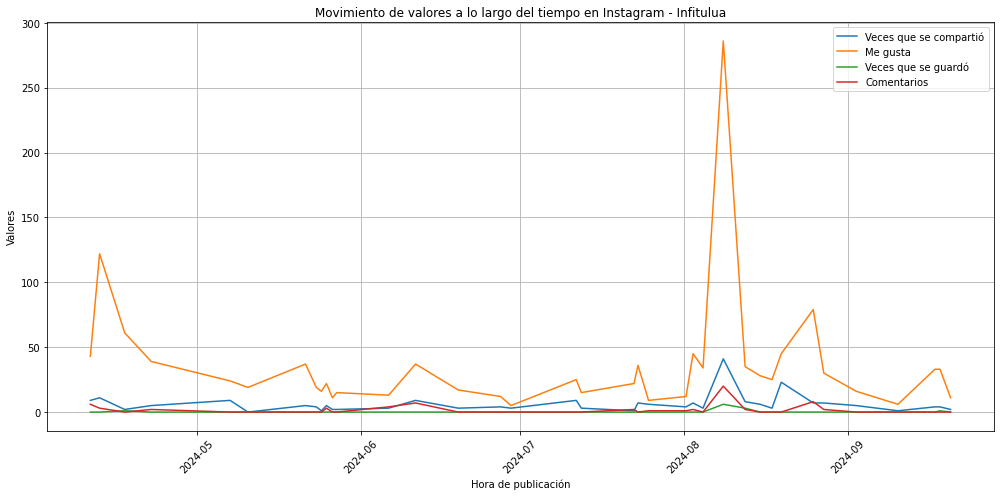

In [95]:
import matplotlib.pyplot as plt

# Asegurarnos de que no haya espacios en los nombres de las columnas
data_ultimos_4_meses_Instagram_infitulua.columns = data_ultimos_4_meses_Instagram_infitulua.columns.str.strip()

# Convertir 'Hora de publicación' a formato datetime usando el formato correcto
data_ultimos_4_meses_Instagram_infitulua['Hora de publicación'] = pd.to_datetime(
    data_ultimos_4_meses_Instagram_infitulua['Hora de publicación'], 
    format='%Y-%m-%d %H:%M:%S', 
    errors='coerce'
)

# Ordenar los datos por 'Hora de publicación'
data_linea_temporal_infitulua_original = data_ultimos_4_meses_Instagram_infitulua.sort_values(by='Hora de publicación')

# Seleccionar columnas relevantes sin eliminar filas con valores NaN
selected_columns = ['Hora de publicación', 'Impresiones', 'Alcance', 'Veces que se compartió', 'Me gusta', 'Veces que se guardó', 'Comentarios']
data_linea_temporal_infitulua_original = data_linea_temporal_infitulua_original[selected_columns]

# Interpolar valores nulos para todas las columnas seleccionadas
data_linea_temporal_infitulua_original[['Impresiones', 'Alcance', 'Veces que se compartió', 'Me gusta', 'Veces que se guardó', 'Comentarios']] = data_linea_temporal_infitulua_original[['Impresiones', 'Alcance', 'Veces que se compartió', 'Me gusta', 'Veces que se guardó', 'Comentarios']].interpolate()

# Mostrar datos intermedios para verificar
print(data_linea_temporal_infitulua_original.head())
print(data_linea_temporal_infitulua_original.tail())

# Graficar los datos
plt.figure(figsize=(14, 7))

plt.plot(data_linea_temporal_infitulua_original['Hora de publicación'], data_linea_temporal_infitulua_original['Veces que se compartió'], label='Veces que se compartió')
plt.plot(data_linea_temporal_infitulua_original['Hora de publicación'], data_linea_temporal_infitulua_original['Me gusta'], label='Me gusta')
plt.plot(data_linea_temporal_infitulua_original['Hora de publicación'], data_linea_temporal_infitulua_original['Veces que se guardó'], label='Veces que se guardó')
plt.plot(data_linea_temporal_infitulua_original['Hora de publicación'], data_linea_temporal_infitulua_original['Comentarios'], label='Comentarios')

plt.xlabel('Hora de publicación')
plt.ylabel('Valores')
plt.title('Movimiento de valores a lo largo del tiempo en Instagram - Infitulua')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [96]:
data_vital_4_meses_insta_infi = data_ultimos_4_meses_Instagram_infitulua[['Hora de publicación','Comentarios','Veces que se guardó','Veces que se compartió','Alcance','Me gusta','Impresiones','Duración (segundos)','Seguimientos']]
data_vital_4_meses_insta_infi.head(7)

,Hora de publicación,Comentarios,Veces que se guardó,Veces que se compartió,Alcance,Me gusta,Impresiones,Duración (segundos),Seguimientos
0,2024-04-10 20:04:00,6,0,9,1328,43,1594,47,3.0
1,2024-04-12 14:04:00,3,0,11,3006,122,3404,30,NaN
2,2024-04-17 08:04:00,0,1,2,8107,61,14543,0,2.0
3,2024-04-22 08:04:00,2,0,5,695,39,818,36,4.0
4,2024-05-07 06:05:00,0,0,9,1458,24,1652,0,1.0
5,2024-05-10 15:05:00,0,0,0,219,19,259,3460,NaN
6,2024-05-21 12:05:00,0,0,5,1460,37,1858,37,NaN


In [97]:
data_vital_4_meses_insta_infi.describe()

,Comentarios,Veces que se guardó,Veces que se compartió,Alcance,Me gusta,Impresiones,Duración (segundos),Seguimientos
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,13.000000
mean,1.702703,0.297297,6.162162,1083.756757,36.135135,1460.027027,132.891892,3.615385
std,3.718310,1.102141,7.139536,1499.886744,47.619535,2465.185439,562.841787,4.664377
min,0.000000,0.000000,0.000000,112.000000,5.000000,124.000000,0.000000,1.000000
25%,0.000000,0.000000,3.000000,348.000000,15.000000,453.000000,30.000000,1.000000
50%,0.000000,0.000000,4.000000,577.000000,25.000000,717.000000,44.000000,2.000000
75%,2.000000,0.000000,7.000000,1286.000000,37.000000,1525.000000,59.000000,4.000000
max,20.000000,6.000000,41.000000,8107.000000,286.000000,14543.000000,3460.000000,18.000000


<AxesSubplot:>

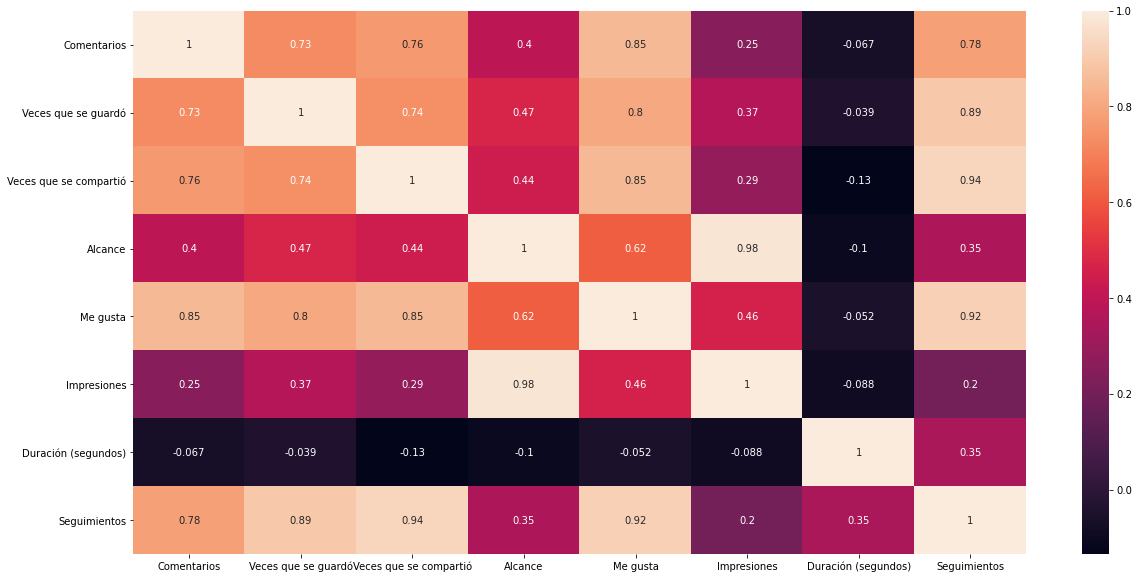

In [98]:
plt.figure(figsize=(20, 10))
sns.heatmap(data_vital_4_meses_insta_infi.corr(),  annot=True)

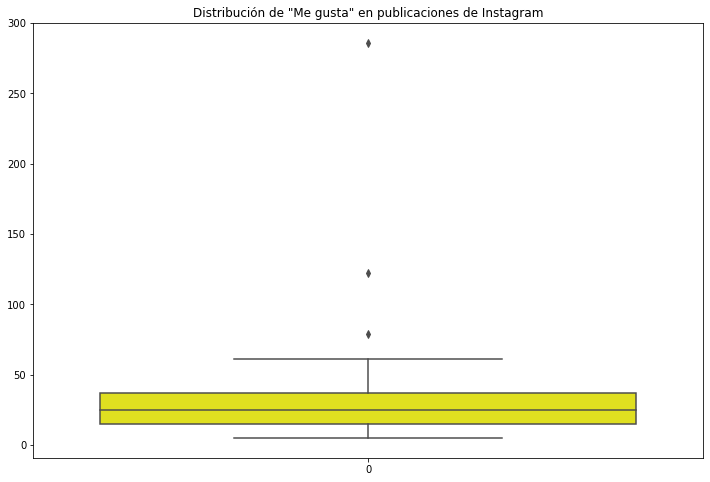

In [99]:
# Suponiendo que 'data_cuantitativa_proyectos_insta_tipo_publica' es el DataFrame filtrado con los datos relevantes
# Crear el gráfico boxplot con tamaño aumentado y color amarillo
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_vital_4_meses_insta_infi['Me gusta'], color='yellow')
plt.title('Distribución de "Me gusta" en publicaciones de Instagram')
plt.show()

In [100]:
# Encuentra el índice de la fila con la mayor cantidad de 'Me gusta'
indice_me_gusta_maximo = data_ultimos_4_meses_Instagram_infitulua['Me gusta'].idxmax()

# Obtén el identificador de la publicación con la mayor cantidad de 'Me gusta'
id_publicacion_me_gusta_maximo = data_ultimos_4_meses_Instagram_infitulua.loc[indice_me_gusta_maximo, 'Identificador de la publicación']

# Mostrar la descripción completa de la publicación
descripcion_me_gusta_maximo = data_ultimos_4_meses_Instagram_infitulua.loc[
    data_ultimos_4_meses_Instagram_infitulua['Identificador de la publicación'] == id_publicacion_me_gusta_maximo, 
    'Descripción'
].values[0]

# Imprimir la descripción de la publicación con la mayor cantidad de 'Me gusta'
print(f"Descripción de la publicación con mayor cantidad de 'Me gusta' (ID: {id_publicacion_me_gusta_maximo}): {descripcion_me_gusta_maximo}")


Descripción de la publicación con mayor cantidad de 'Me gusta' (ID: 18318105508153471): ¡Tuluá se transforma!✅ 

Estamos impulsando nuevos planes con la Antigua Terminal con el fin optimizar el tráfico y mejorar la viabilidad de nuestro municipio 🌟 Con cada proyecto, avanzamos hacia un futuro más próspero y dinámico. Juntos, estamos construyendo un Tuluá #ParaSerFelices 💙🙌🏽


In [101]:
# Encuentra el índice de la fila con la menor cantidad de 'Me gusta'
indice_me_gusta_minimo = data_ultimos_4_meses_Instagram_infitulua['Me gusta'].idxmin()

# Obtén el identificador de la publicación con la menor cantidad de 'Me gusta'
id_publicacion_me_gusta_minimo = data_ultimos_4_meses_Instagram_infitulua.loc[indice_me_gusta_minimo, 'Identificador de la publicación']

# Imprime el identificador de la publicación con menor cantidad de 'Me gusta'
print("Identificador de la publicación con menor cantidad de 'Me gusta':", id_publicacion_me_gusta_minimo)

# Encuentra la descripción correspondiente a ese identificador de publicación
descripcion_me_gusta_minimo = data_ultimos_4_meses_Instagram_infitulua.loc[
    data_ultimos_4_meses_Instagram_infitulua['Identificador de la publicación'] == id_publicacion_me_gusta_minimo, 
    'Descripción'
].values[0]

# Imprime la descripción correspondiente al ID con menor cantidad de 'Me gusta'
print(f"Descripción de la publicación con menor cantidad de 'Me gusta' (ID: {id_publicacion_me_gusta_minimo}): {descripcion_me_gusta_minimo}")

# Encuentra los índices de las tres publicaciones con menor cantidad de 'Me gusta'
indices_tres_menores_me_gustas = data_ultimos_4_meses_Instagram_infitulua['Me gusta'].nsmallest(3).index

# Obtén y imprime las descripciones de estas tres publicaciones
descripciones_tres_menores_me_gustas = data_ultimos_4_meses_Instagram_infitulua.loc[indices_tres_menores_me_gustas, 'Descripción'].values
print("Descripciones de las tres publicaciones con menor cantidad de 'Me gusta' en Infitulua Instagram:")
for descripcion in descripciones_tres_menores_me_gustas:
    print("- " + str(descripcion))


Identificador de la publicación con menor cantidad de 'Me gusta': 18060002197613589
Descripción de la publicación con menor cantidad de 'Me gusta' (ID: 18060002197613589): ¡Tenemos diferentes proyectos inmobiliarios para ti! ✅
¿Haces parte de ellos? Cuéntanos aquí si has comprado o invertido ⬇️ ¡Te leemos!
Descripciones de las tres publicaciones con menor cantidad de 'Me gusta' en Infitulua Instagram:
- ¡Tenemos diferentes proyectos inmobiliarios para ti! ✅
¿Haces parte de ellos? Cuéntanos aquí si has comprado o invertido ⬇️ ¡Te leemos!
- ¡Desde INFITULUÁ trabajamos día a día para estar más cerca de ti!

Por eso, te invitamos a que conozcas nuestros diferentes métodos de atención para brindarte toda la asesoría que necesitas 🥳

Continuamos construyendo una Tuluá #ParaSerFelices
- Te invitamos a participar de la Expo Vivienda y servicios más grande de Tuluá organizada por @supergiroscentrodelvalle en donde Infituluá te mostrará opciones para tener vivienda propia.

¡Comparte la felicida

  Hora de publicación  Impresiones  Alcance  Veces que se compartió  Me gusta  \
0 2024-04-10 20:04:00         1594     1328                       9        43   
1 2024-04-12 14:04:00         3404     3006                      11       122   
2 2024-04-17 08:04:00        14543     8107                       2        61   
3 2024-04-22 08:04:00          818      695                       5        39   
4 2024-05-07 06:05:00         1652     1458                       9        24   

   Veces que se guardó  Comentarios  
0                    0            6  
1                    0            3  
2                    1            0  
3                    0            2  
4                    0            0  
   Hora de publicación  Impresiones  Alcance  Veces que se compartió  \
32 2024-09-02 14:09:00          492      417                       5   
33 2024-09-10 11:09:00          219      173                       1   
34 2024-09-17 11:09:00          961      726                       4 

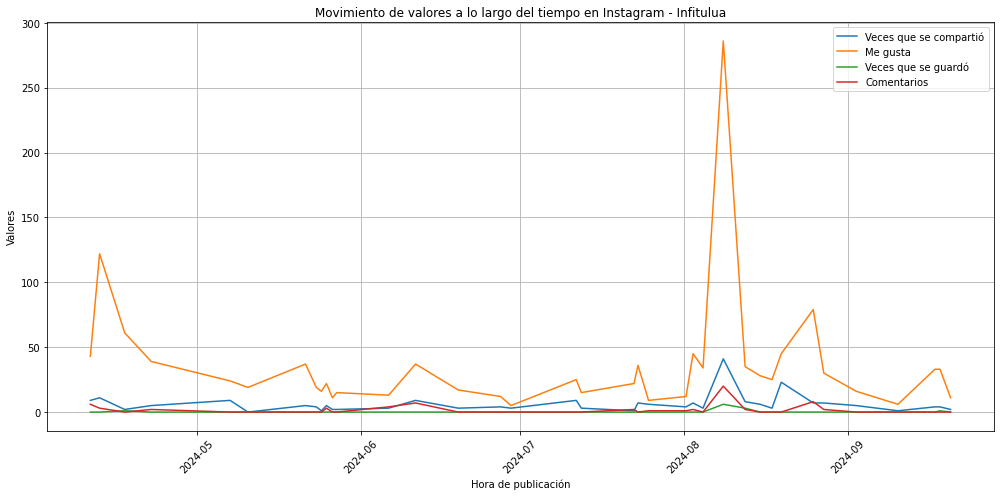

In [102]:
# Asegurarnos de que no haya espacios en los nombres de las columnas
data_ultimos_4_meses_Instagram_infitulua.columns = data_ultimos_4_meses_Instagram_infitulua.columns.str.strip()

# Convertir 'Hora de publicación' a formato datetime usando el formato correcto
data_ultimos_4_meses_Instagram_infitulua['Hora de publicación'] = pd.to_datetime(
    data_ultimos_4_meses_Instagram_infitulua['Hora de publicación'], 
    format='%Y-%m-%d %H:%M:%S', 
    errors='coerce'
)

# Ordenar los datos por 'Hora de publicación'
data_linea_temporal_infitulua_original = data_ultimos_4_meses_Instagram_infitulua.sort_values(by='Hora de publicación')

# Seleccionar columnas relevantes sin eliminar filas con valores NaN
selected_columns = ['Hora de publicación', 'Impresiones', 'Alcance', 'Veces que se compartió', 'Me gusta', 'Veces que se guardó', 'Comentarios']
data_linea_temporal_infitulua_original = data_linea_temporal_infitulua_original[selected_columns]

# Interpolar valores nulos para todas las columnas seleccionadas
data_linea_temporal_infitulua_original[['Impresiones', 'Alcance', 'Veces que se compartió', 'Me gusta', 'Veces que se guardó', 'Comentarios']] = data_linea_temporal_infitulua_original[['Impresiones', 'Alcance', 'Veces que se compartió', 'Me gusta', 'Veces que se guardó', 'Comentarios']].interpolate()

# Mostrar datos intermedios para verificar
print(data_linea_temporal_infitulua_original.head())
print(data_linea_temporal_infitulua_original.tail())

# Graficar los datos
plt.figure(figsize=(14, 7))

plt.plot(data_linea_temporal_infitulua_original['Hora de publicación'], data_linea_temporal_infitulua_original['Veces que se compartió'], label='Veces que se compartió')
plt.plot(data_linea_temporal_infitulua_original['Hora de publicación'], data_linea_temporal_infitulua_original['Me gusta'], label='Me gusta')
plt.plot(data_linea_temporal_infitulua_original['Hora de publicación'], data_linea_temporal_infitulua_original['Veces que se guardó'], label='Veces que se guardó')
plt.plot(data_linea_temporal_infitulua_original['Hora de publicación'], data_linea_temporal_infitulua_original['Comentarios'], label='Comentarios')

plt.xlabel('Hora de publicación')
plt.ylabel('Valores')
plt.title('Movimiento de valores a lo largo del tiempo en Instagram - Infitulua')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


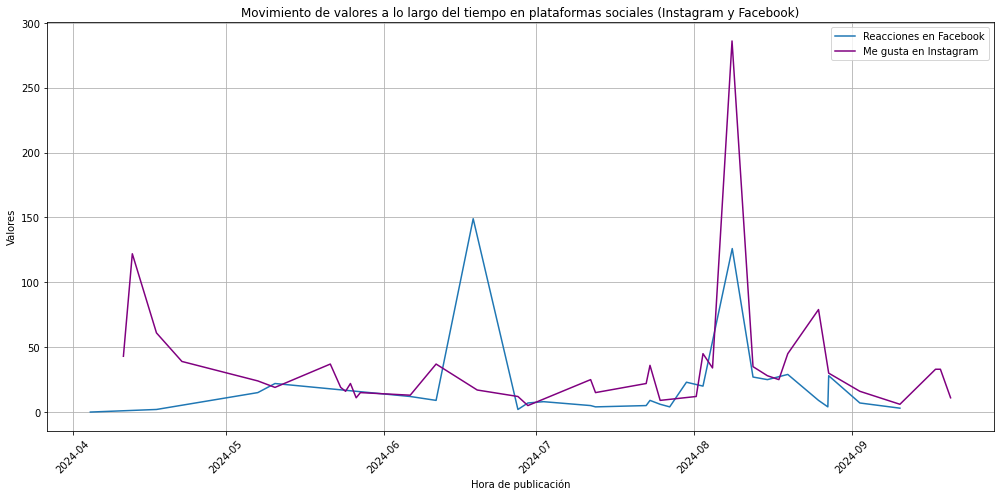

In [103]:
# Asegurarnos de que no haya espacios en los nombres de las columnas de ambos datasets
data_ultimos_4_meses_Instagram_infitulua.columns = data_ultimos_4_meses_Instagram_infitulua.columns.str.strip()
data_ultimos_3_meses_facebook_infitulua.columns = data_ultimos_3_meses_facebook_infitulua.columns.str.strip()

# Convertir 'Hora de publicación' a formato datetime y ordenar por fecha en ambos datasets
data_ultimos_4_meses_Instagram_infitulua['Hora de publicación'] = pd.to_datetime(
    data_ultimos_4_meses_Instagram_infitulua['Hora de publicación'], 
    format='%Y-%m-%d %H:%M:%S', 
    errors='coerce'
)
data_ultimos_3_meses_facebook_infitulua['Hora de publicación'] = pd.to_datetime(
    data_ultimos_3_meses_facebook_infitulua['Hora de publicación'], 
    format='%Y-%m-%d %H:%M:%S', 
    errors='coerce'
)

# Ordenar por 'Hora de publicación'
data_ultimos_4_meses_Instagram_infitulua = data_ultimos_4_meses_Instagram_infitulua.sort_values(by='Hora de publicación')
data_ultimos_3_meses_facebook_infitulua = data_ultimos_3_meses_facebook_infitulua.sort_values(by='Hora de publicación')

# Interpolar valores nulos para las columnas necesarias en ambos datasets
data_ultimos_4_meses_Instagram_infitulua['Me gusta'] = data_ultimos_4_meses_Instagram_infitulua['Me gusta'].interpolate()
data_ultimos_3_meses_facebook_infitulua['Reacciones'] = data_ultimos_3_meses_facebook_infitulua['Reacciones'].interpolate()

# Graficar los datos
plt.figure(figsize=(14, 7))

plt.plot(
    data_ultimos_3_meses_facebook_infitulua['Hora de publicación'], 
    data_ultimos_3_meses_facebook_infitulua['Reacciones'], 
    label='Reacciones en Facebook'
)
plt.plot(
    data_ultimos_4_meses_Instagram_infitulua['Hora de publicación'], 
    data_ultimos_4_meses_Instagram_infitulua['Me gusta'], 
    label='Me gusta en Instagram', 
    color='purple'  # Color morado para Instagram
)

plt.xlabel('Hora de publicación')
plt.ylabel('Valores')
plt.title('Movimiento de valores a lo largo del tiempo en plataformas sociales (Instagram y Facebook)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


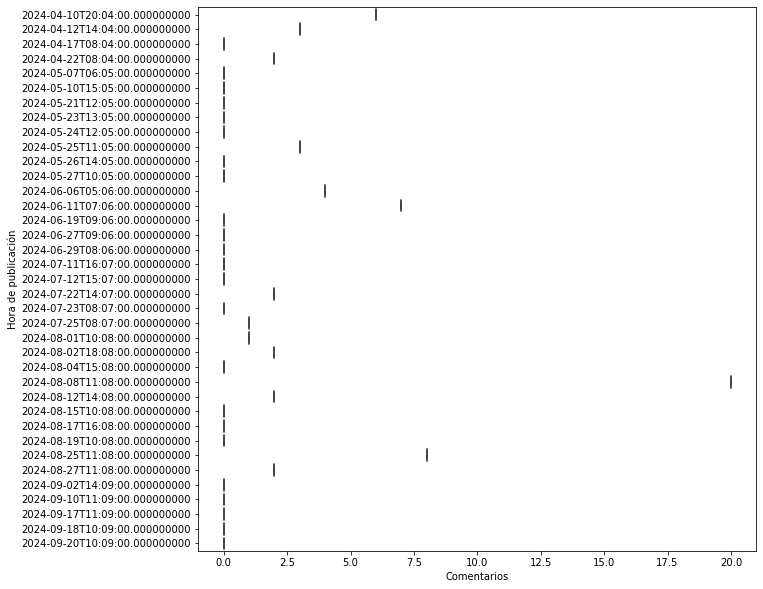

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer el tamaño de la figura
plt.figure(figsize=(10, 10))

# Crear el boxplot con seaborn utilizando el dataset correcto
sns.boxplot(x=data_ultimos_4_meses_Instagram_infitulua['Comentarios'], 
            y=data_ultimos_4_meses_Instagram_infitulua['Hora de publicación'])

# Configurar etiquetas de los ejes
plt.xlabel('Comentarios')
plt.ylabel('Hora de publicación')

# Mostrar el gráfico
plt.show()


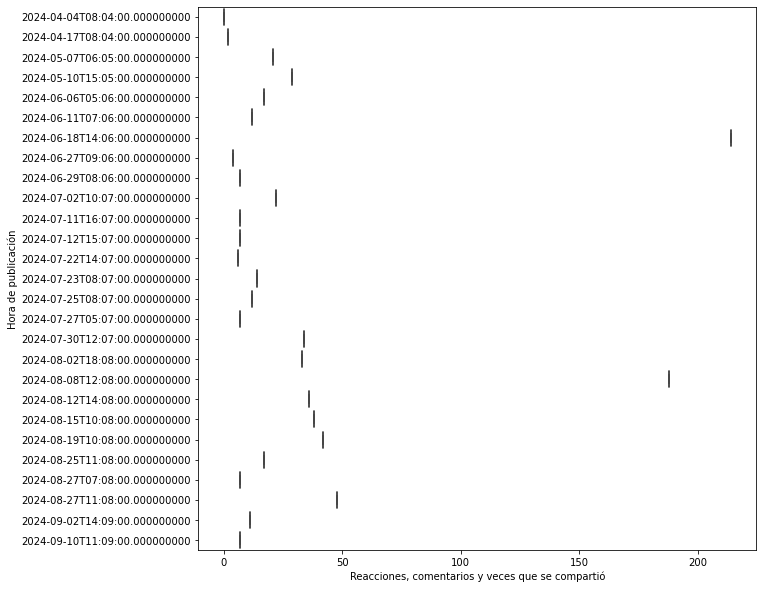

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer el tamaño de la figura
plt.figure(figsize=(10, 10))

# Crear el boxplot con seaborn utilizando el dataset correcto
sns.boxplot(x=data_ultimos_3_meses_facebook_infitulua['Reacciones, comentarios y veces que se compartió'], 
            y=data_ultimos_3_meses_facebook_infitulua['Hora de publicación'])

# Configurar etiquetas de los ejes
plt.xlabel('Reacciones, comentarios y veces que se compartió')
plt.ylabel('Hora de publicación')

# Mostrar el gráfico
plt.show()


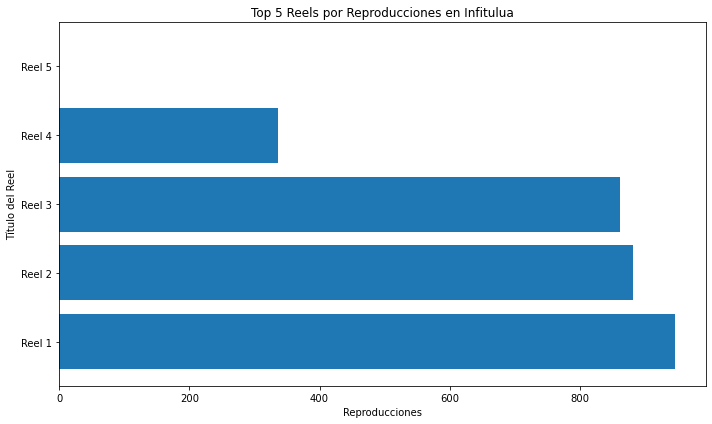

In [2]:
import matplotlib.pyplot as plt

# Data for reproducciones de reels
reels_titles = ['Reel 1', 'Reel 2', 'Reel 3', 'Reel 4', 'Reel 5']
reels_reproductions = [946, 881, 861, 336, 0]

# Gráfico de Reproducciones de Reels
plt.figure(figsize=(10,6))
plt.barh(reels_titles, reels_reproductions)
plt.xlabel('Reproducciones')
plt.ylabel('Título del Reel')
plt.title('Top 5 Reels por Reproducciones en Infitulua')
plt.tight_layout()
plt.show()


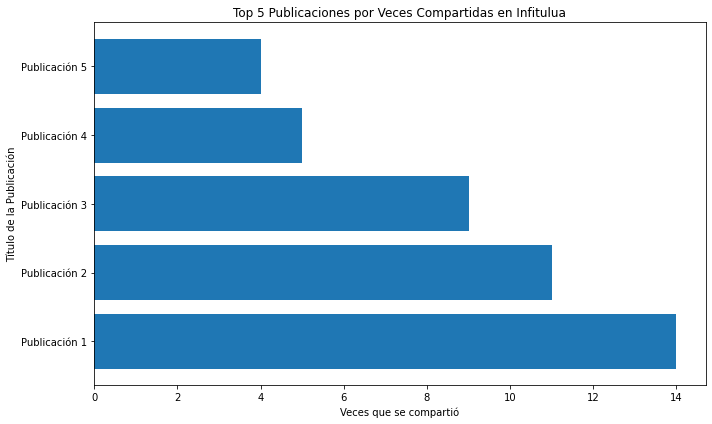

In [3]:
# Data for veces compartidas
publications_titles = ['Publicación 1', 'Publicación 2', 'Publicación 3', 'Publicación 4', 'Publicación 5']
shared_times = [14, 11, 9, 5, 4]

# Gráfico de Veces Compartidas
plt.figure(figsize=(10,6))
plt.barh(publications_titles, shared_times)
plt.xlabel('Veces que se compartió')
plt.ylabel('Título de la Publicación')
plt.title('Top 5 Publicaciones por Veces Compartidas en Infitulua')
plt.tight_layout()
plt.show()


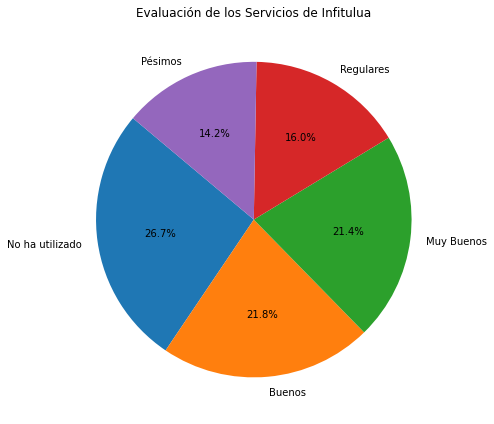

In [4]:
# Data for evaluación de servicios
evaluacion_labels = ['No ha utilizado', 'Buenos', 'Muy Buenos', 'Regulares', 'Pésimos']
evaluacion_values = [25.6, 20.9, 20.5, 15.4, 13.6]

# Gráfico de Evaluación de los Servicios
plt.figure(figsize=(10,6))
plt.pie(evaluacion_values, labels=evaluacion_labels, autopct='%1.1f%%', startangle=140)
plt.title('Evaluación de los Servicios de Infitulua')
plt.tight_layout()
plt.show()


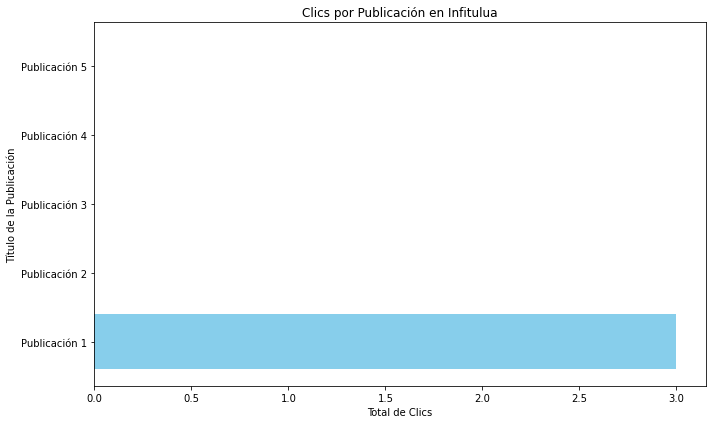

In [5]:
import matplotlib.pyplot as plt

# Data for clics en publicaciones
clicks_titles = ['Publicación 1', 'Publicación 2', 'Publicación 3', 'Publicación 4', 'Publicación 5']
clicks_counts = [3, 0, 0, 0, 0]

# Gráfico de Total de Clics por Publicación
plt.figure(figsize=(10,6))
plt.barh(clicks_titles, clicks_counts, color='skyblue')
plt.xlabel('Total de Clics')
plt.ylabel('Título de la Publicación')
plt.title('Clics por Publicación en Infitulua')
plt.tight_layout()
plt.show()


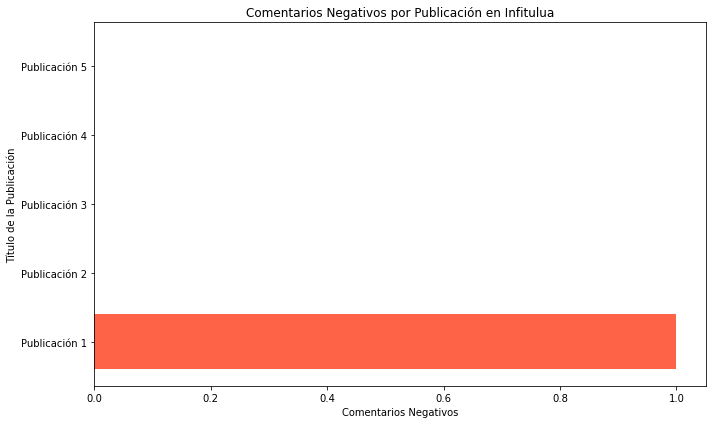

In [6]:
# Data for comentarios negativos
negative_comments_titles = ['Publicación 1', 'Publicación 2', 'Publicación 3', 'Publicación 4', 'Publicación 5']
negative_comments_counts = [1, 0, 0, 0, 0]

# Gráfico de Comentarios Negativos por Publicación
plt.figure(figsize=(10,6))
plt.barh(negative_comments_titles, negative_comments_counts, color='tomato')
plt.xlabel('Comentarios Negativos')
plt.ylabel('Título de la Publicación')
plt.title('Comentarios Negativos por Publicación en Infitulua')
plt.tight_layout()
plt.show()


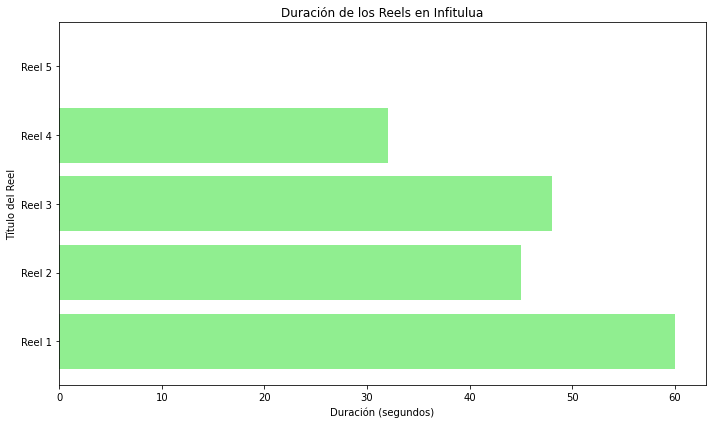

In [8]:
# Data for duración de reels
duration_titles = ['Reel 1', 'Reel 2', 'Reel 3', 'Reel 4', 'Reel 5']
durations = [60, 45, 48, 32, 0]

# Gráfico de Duración de Reels
plt.figure(figsize=(10,6))
plt.barh(duration_titles, durations, color='lightgreen')
plt.xlabel('Duración (segundos)')
plt.ylabel('Título del Reel')
plt.title('Duración de los Reels en Infitulua')
plt.tight_layout()
plt.show()
